# Improving Model Performance of Shortest-Path-Based Centrality Measures in Network Models through Scale Space

# GENERİC LIBRARY 

In [3]:
# pip install spektral

In [4]:
import numpy as np
import pandas as pd
import os
import networkx as nx
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

#from spektral.layers import GraphConv
import spektral
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2

from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img
import snap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sn
import math
import warnings
from collections import deque
from heapq import heappop, heappush
from itertools import count
from networkx.algorithms.shortest_paths.weighted import _weight_function
from networkx.utils import py_random_state
from networkx.utils.decorators import not_implemented_for
import functools
from sklearn.preprocessing import StandardScaler
from networkx.algorithms.shortest_paths.weighted import _weight_function

In [5]:
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as img
import snap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sn
import math
import warnings
from collections import deque
from heapq import heappop, heappush
from itertools import count
from networkx.algorithms.shortest_paths.weighted import _weight_function
from networkx.utils import py_random_state
from networkx.utils.decorators import not_implemented_for
import functools

 # Scale Edge Betweenness Centrality (SEBC) metric

In [6]:
def Stretch_Edge_Betweenless_Centrality(G,Stretch): 
    def _single_source_dijkstra_path_basic(G, s, weight,Stretch):
        weight = _weight_function(G, weight)
        # modified from Eppstein
        S = []
        P = {}
        for v in G:
            P[v] = []
        sigma = dict.fromkeys(G, 0.0)  # sigma[v]=0 for v in G
        D = {}
        sigma[s] = 1.0
        push = heappush
        pop = heappop
        seen = {s: 0}
        c = count()
        Q = []  # use Q as heap with (distance,node id) tuples
        push(Q, (0, next(c), s, s))
        while Q:
            (dist, _, pred, v) = pop(Q)
            if v in D:
                continue  # already searched this node.
            sigma[v] += sigma[pred]  # count paths
            S.append(v)
            D[v] = dist
            for w, edgedata in G[v].items():
                vw_dist = dist + weight(v, w, edgedata)
                if w not in D and (w not in seen or vw_dist < seen[w]*(2-Stretch)): # adding code according to EBC
                    seen[w] = vw_dist
                    push(Q, (vw_dist, next(c), v, w))
                    sigma[w] = 0.0
                    P[w] = [v]
                elif vw_dist <= seen[w]*Stretch:  # handle equal paths vw_dist == seen[w]  # other adding code according to EBC
                    sigma[w] += sigma[v] # V BEING ON THE CRITICAL PATH MEASURES THE NUMBER OF TIMES W AND V ARE ON THE SAME CRITICAL PATH..
                    P[w].append(v)
        return S, P, sigma, D

    def _accumulate_edges(betweenness, S, P, sigma, s):
        delta = dict.fromkeys(S, 0)
        while S:
            w = S.pop()
            coeff = (1 + delta[w]) / sigma[w]# KRİTİK YOL OLMASI 
            for v in P[w]:
                c = sigma[v] * coeff
                if (v, w) not in betweenness: #    and if l=l, if v,m is not in betweennes, assign 
                    betweenness[(w, v)] += c
                else:
                    betweenness[(v, w)] += c  #  If elif is in the future and l=l, assign the inverse. 
            # elif (v,w) not in betweenness  and   If  l!=l  betweenness[(w, v)]+=c*(1-alfa)
            # else   betweenness[(v, w)] += c*(1-alfa)
            
            
                delta[v] += c
            if w != s:
                betweenness[w] += delta[w]
        return betweenness
    #def edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None):


    def _rescale_e(betweenness, n, normalized, directed=False, k=None):
        if normalized:
            if n <= 1:
                scale = None  # no normalization b=0 for all nodes
            else:
                scale = 1 / (n * (n - 1))
        else:  # rescale by 2 for undirected graphs
            if not directed:
                scale = 0.5
            else:
                scale = None
        if scale is not None:
            if k is not None:
                scale = scale * n / k
            for v in betweenness:
                betweenness[v] *= scale
        return betweenness


    import networkx as nx
    
    import warnings
    from collections import deque
    from heapq import heappop, heappush
    from itertools import count
    from networkx.algorithms.shortest_paths.weighted import _weight_function
    from networkx.utils import py_random_state
    from networkx.utils.decorators import not_implemented_for
   
    weight="weight"
    normalized=True


    k=None
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G
        # b[e]=0 for e in G.edges()
    betweenness.update(dict.fromkeys(G.edges(), 0.0))
    if k is None:
        nodes = G
    else:
        nodes = seed.sample(G.nodes(), k)
    for s in nodes:
        # single source shortest paths
        if weight is None:  # use BFS
            S, P, sigma, _ = _single_source_shortest_path_basic(G, s)
        else:  # use Dijkstra's algorithm
            S, P, sigma, _ =_single_source_dijkstra_path_basic(G, s, weight,Stretch)
        #print(sigma)
        # accumulation
        betweenness =_accumulate_edges(betweenness, S, P, sigma, s)
    # rescaling
    for n in G:  # remove nodes to only return edges
        del betweenness[n]
    betweenness = _rescale_e(
        betweenness, len(G), normalized=normalized, directed=G.is_directed()
    )
    if G.is_multigraph():
        betweenness = _add_edge_keys(G, betweenness, weight=weight)
    return(betweenness)

# Scale Edge Closeness Centrality (SECC)

In [7]:
def single_source_shortest_path_length(G,Streach, source,cutoff=None):

    seen={}                  # level (number of hops) when seen in BFS
    level=0                  # the current level
    nextlevel={source:1}  # dict of nodes to check at next level
    while nextlevel:
        thislevel=nextlevel  # advance to next level
        nextlevel={}         # and start a new list (fringe)
        for v in thislevel:
            if v not in seen:
                seen[v]=level # set the level of vertex v
                nextlevel.update(G[v]) # add neighbors of v
        if (cutoff is not None and cutoff <= level):  break
        level=level+1
    return seen

In [8]:
def closeness_centrality(G, Stretch, u=None,distance=None, wf_improved=True):

    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            nx.single_source_dijkstra_path_length, weight=distance
        )
    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = G.nodes
    else:
        nodes = [u]
    closeness_dict = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_dict[n] = _closeness_centrality
    if u is not None:
        return closeness_dict[u]
    return closeness_dict


In [9]:
def closeness_centrality(G, Stretch, u=None,distance=None, wf_improved=True):
    Stretch=Stretch
    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            single_source_dijkstra_path_length ,weight=distance,Stretch=Stretch)
        
    else:
        path_length = single_source_shortest_path_length(Stretch)

    if u is None:
        nodes = G.nodes
    else:
        nodes = [u]
    closeness_dict = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_dict[n] = _closeness_centrality
    if u is not None:
        return closeness_dict[u]
    return closeness_dict

In [10]:
def single_source_dijkstra_path_length(G, source, cutoff=None, weight="weight"):
    return multi_source_dijkstra_path_length(G, {source}, cutoff=cutoff, weight=weight)

In [11]:

def single_source_dijkstra_path_length(G, source,Stretch ,cutoff=None, weight="weight"):
    return multi_source_dijkstra_path_length(G, {source}, Stretch,cutoff=cutoff, weight=weight)

In [12]:


def Stretch_closeness_centrality(G, Stretch, u=None,distance=None, wf_improved=True):
    

    def single_source_dijkstra_path_length(G, source,Stretch ,cutoff=None, weight="weight"):
        return multi_source_dijkstra_path_length(G, {source}, Stretch,cutoff=cutoff, weight=weight)

    from collections import deque
    from heapq import heappop, heappush
    from itertools import count

    import networkx as nx
    from networkx.algorithms.shortest_paths.generic import _build_paths_from_predecessors

    __all__ = [
        "dijkstra_path",
        "dijkstra_path_length",
        "bidirectional_dijkstra",
        "single_source_dijkstra",
        "single_source_dijkstra_path",
        "single_source_dijkstra_path_length",
        "multi_source_dijkstra",
        "multi_source_dijkstra_path",
        "multi_source_dijkstra_path_length",
        "all_pairs_dijkstra",
        "all_pairs_dijkstra_path",
        "all_pairs_dijkstra_path_length",
        "dijkstra_predecessor_and_distance",
        "bellman_ford_path",
        "bellman_ford_path_length",
        "single_source_bellman_ford",
        "single_source_bellman_ford_path",
        "single_source_bellman_ford_path_length",
        "all_pairs_bellman_ford_path",
        "all_pairs_bellman_ford_path_length",
        "bellman_ford_predecessor_and_distance",
        "negative_edge_cycle",
        "find_negative_cycle",
        "goldberg_radzik",
        "johnson",
    ]


    def _weight_function(G, weight):
        if callable(weight):
            return weight
        # If the weight keyword argument is not callable, we assume it is a
        # string representing the edge attribute containing the weight of
        # the edge.
        if G.is_multigraph():
            return lambda u, v, d: min(attr.get(weight, 1) for attr in d.values())
        return lambda u, v, data: data.get(weight, 1)


    def dijkstra_path(G, source, target, weight="weight"):

        (length, path) = single_source_dijkstra(G, source, target=target, weight=weight)
        return path



    def dijkstra_path_length(G, source, target, weight="weight"):

        if source not in G:
            raise nx.NodeNotFound(f"Node {source} not found in graph")
        if source == target:
            return 0
        weight = _weight_function(G, weight)
        length = _dijkstra(G, source, weight, target=target)
        try:
            return length[target]
        except KeyError as err:
            raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}") from err
    def single_source_dijkstra(G, source, target=None, cutoff=None, weight="weight"):

        return multi_source_dijkstra(
            G, {source}, cutoff=cutoff, target=target, weight=weight
        )



    def multi_source_dijkstra_path(G, sources, cutoff=None, weight="weight"):

        length, path = multi_source_dijkstra(G, sources, cutoff=cutoff, weight=weight)
        return path



    def multi_source_dijkstra_path_length(G, sources, Stretch, cutoff=None, weight="weight"):

        if not sources:
            raise ValueError("sources must not be empty")
        for s in sources:
            if s not in G:
                raise nx.NodeNotFound(f"Node {s} not found in graph")
        weight = _weight_function(G, weight)
        return _dijkstra_multisource(G, sources,Stretch, weight, cutoff=cutoff)



    def multi_source_dijkstra(G, sources,Stretch, target=None, cutoff=None, weight="weight"):

        if not sources:
            raise ValueError("sources must not be empty")
        for s in sources:
            if s not in G:
                raise nx.NodeNotFound(f"Node {s} not found in graph")
        if target in sources:
            return (0, [target])
        weight = _weight_function(G, weight)
        paths = {source: [source] for source in sources}  # dictionary of paths
        dist = _dijkstra_multisource(
            G, sources, Stretch,weight, paths=paths, cutoff=cutoff, target=target
        )
        if target is None:
            return (dist, paths)
        try:
            return (dist[target], paths[target])
        except KeyError as err:
            raise nx.NetworkXNoPath(f"No path to {target}.") from err



    def _dijkstra(G, source,Stretch, weight, pred=None, paths=None, cutoff=None, target=None):

        return _dijkstra_multisource(
            G, [source], Stretch,weight, pred=pred, paths=paths, cutoff=cutoff, target=target
        )


    def _dijkstra_multisource(
        G, sources, Stretch, weight, pred=None, paths=None, cutoff=None, target=None
    ):

        G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

        push = heappush
        pop = heappop
        dist = {}  # dictionary of final distances
        seen = {}
        # fringe is heapq with 3-tuples (distance,c,node)
        # use the count c to avoid comparing nodes (may not be able to)
        c = count()
        fringe = []
        for source in sources:
            seen[source] = 0
            push(fringe, (0, next(c), source))
        while fringe:
            (d, _, v) = pop(fringe)
            if v in dist:
                continue  # already searched this node.
            dist[v] = d
            if v == target:
                break
            for u, e in G_succ[v].items():
                cost = weight(v, u, e)
                if cost is None:
                    continue
                vu_dist = dist[v] + cost
                if cutoff is not None:
                    if vu_dist > cutoff:
                        continue
                if u in dist:
                    u_dist = dist[u]
                    if vu_dist < u_dist:
                        raise ValueError("Contradictory paths found:", "negative weights?")
                    elif pred is not None and vu_dist == u_dist:
                        pred[u].append(v)
                elif u not in seen or vu_dist < seen[u]*(2-Stretch): # ilk değişim
                    seen[u] = vu_dist
                    push(fringe, (vu_dist, next(c), u))
                    if paths is not None:
                        paths[u] = paths[v] + [u]
                    if pred is not None:
                        pred[u] = [v]
                elif vu_dist <= seen[u]*Stretch:  # ikinci değişim
                    if pred is not None:
                        pred[u].append(v)

        # The optional predecessor and path dictionaries can be accessed
        # by the caller via the pred and paths objects passed as arguments.
        return dist


    def dijkstra_predecessor_and_distance(G, source, cutoff=None, weight="weight"):

        if source not in G:
            raise nx.NodeNotFound(f"Node {source} is not found in the graph")
        weight = _weight_function(G, weight)
        pred = {source: []}  # dictionary of predecessors
        return (pred, _dijkstra(G, source, weight, pred=pred, cutoff=cutoff))



    def all_pairs_dijkstra(G, cutoff=None, weight="weight"):

        for n in G:
            dist, path = single_source_dijkstra(G, n, cutoff=cutoff, weight=weight)
            yield (n, (dist, path))



    def all_pairs_dijkstra_path_length(G, cutoff=None, weight="weight"):

        length = single_source_dijkstra_path_length
        for n in G:
            yield (n, length(G, n, cutoff=cutoff, weight=weight))



    def all_pairs_dijkstra_path(G, cutoff=None, weight="weight"):

        path = single_source_dijkstra_path
        # TODO This can be trivially parallelized.
        for n in G:
            yield (n, path(G, n, cutoff=cutoff, weight=weight))



    def bellman_ford_predecessor_and_distance(
        G, source, target=None, weight="weight", heuristic=False
    ):

        if source not in G:
            raise nx.NodeNotFound(f"Node {source} is not found in the graph")
        weight = _weight_function(G, weight)
        if any(weight(u, v, d) < 0 for u, v, d in nx.selfloop_edges(G, data=True)):
            raise nx.NetworkXUnbounded("Negative cycle detected.")

        dist = {source: 0}
        pred = {source: []}

        if len(G) == 1:
            return pred, dist

        weight = _weight_function(G, weight)

        dist = _bellman_ford(
            G, [source], weight, pred=pred, dist=dist, target=target, heuristic=heuristic
        )
        return (pred, dist)



    def _bellman_ford(
        G,
        source,
        weight,
        pred=None,
        paths=None,
        dist=None,
        target=None,
        heuristic=True,
    ):

        if pred is None:
            pred = {v: [] for v in source}

        if dist is None:
            dist = {v: 0 for v in source}

        negative_cycle_found = _inner_bellman_ford(
            G,
            source,
            weight,
            pred,
            dist,
            heuristic,
        )
        if negative_cycle_found is not None:
            raise nx.NetworkXUnbounded("Negative cycle detected.")

        if paths is not None:
            sources = set(source)
            dsts = [target] if target is not None else pred
            for dst in dsts:
                gen = _build_paths_from_predecessors(sources, dst, pred)
                paths[dst] = next(gen)

        return dist


    def _inner_bellman_ford(
        G,
        sources,
        weight,
        pred,
        dist=None,
        heuristic=True,
    ):

        for s in sources:
            if s not in G:
                raise nx.NodeNotFound(f"Source {s} not in G")

        if pred is None:
            pred = {v: [] for v in sources}

        if dist is None:
            dist = {v: 0 for v in sources}

        # Heuristic Storage setup. Note: use None because nodes cannot be None
        nonexistent_edge = (None, None)
        pred_edge = {v: None for v in sources}
        recent_update = {v: nonexistent_edge for v in sources}

        G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)
        inf = float("inf")
        n = len(G)

        count = {}
        q = deque(sources)
        in_q = set(sources)
        while q:
            u = q.popleft()
            in_q.remove(u)

            # Skip relaxations if any of the predecessors of u is in the queue.
            if all(pred_u not in in_q for pred_u in pred[u]):
                dist_u = dist[u]
                for v, e in G_succ[u].items():
                    dist_v = dist_u + weight(u, v, e)

                    if dist_v < dist.get(v, inf):
                        # In this conditional branch we are updating the path with v.
                        # If it happens that some earlier update also added node v
                        # that implies the existence of a negative cycle since
                        # after the update node v would lie on the update path twice.
                        # The update path is stored up to one of the source nodes,
                        # therefore u is always in the dict recent_update
                        if heuristic:
                            if v in recent_update[u]:
                                # Negative cycle found!
                                pred[v].append(u)
                                return v

                            # Transfer the recent update info from u to v if the
                            # same source node is the head of the update path.
                            # If the source node is responsible for the cost update,
                            # then clear the history and use it instead.
                            if v in pred_edge and pred_edge[v] == u:
                                recent_update[v] = recent_update[u]
                            else:
                                recent_update[v] = (u, v)

                        if v not in in_q:
                            q.append(v)
                            in_q.add(v)
                            count_v = count.get(v, 0) + 1
                            if count_v == n:
                                # Negative cycle found!
                                return v

                            count[v] = count_v
                        dist[v] = dist_v
                        pred[v] = [u]
                        pred_edge[v] = u

                    elif dist.get(v) is not None and dist_v == dist.get(v):
                        pred[v].append(u)

        # successfully found shortest_path. No negative cycles found.
        return None


    def bellman_ford_path(G, source, target, weight="weight"):

        length, path = single_source_bellman_ford(G, source, target=target, weight=weight)
        return path



    def bellman_ford_path_length(G, source, target, weight="weight"):

        if source == target:
            if source not in G:
                raise nx.NodeNotFound(f"Node {source} not found in graph")
            return 0

        weight = _weight_function(G, weight)

        length = _bellman_ford(G, [source], weight, target=target)

        try:
            return length[target]
        except KeyError as err:
            raise nx.NetworkXNoPath(f"node {target} not reachable from {source}") from err



    def single_source_bellman_ford_path(G, source, weight="weight"):

        (length, path) = single_source_bellman_ford(G, source, weight=weight)
        return path



    def single_source_bellman_ford_path_length(G, source, weight="weight"):

        weight = _weight_function(G, weight)
        return _bellman_ford(G, [source], weight)



    def single_source_bellman_ford(G, source, target=None, weight="weight"):

        if source == target:
            if source not in G:
                raise nx.NodeNotFound(f"Node {source} is not found in the graph")
            return (0, [source])

        weight = _weight_function(G, weight)

        paths = {source: [source]}  # dictionary of paths
        dist = _bellman_ford(G, [source], weight, paths=paths, target=target)
        if target is None:
            return (dist, paths)
        try:
            return (dist[target], paths[target])
        except KeyError as err:
            msg = f"Node {target} not reachable from {source}"
            raise nx.NetworkXNoPath(msg) from err



    def all_pairs_bellman_ford_path_length(G, weight="weight"):

        length = single_source_bellman_ford_path_length
        for n in G:
            yield (n, dict(length(G, n, weight=weight)))



    def all_pairs_bellman_ford_path(G, weight="weight"):

        path = single_source_bellman_ford_path
        # TODO This can be trivially parallelized.
        for n in G:
            yield (n, path(G, n, weight=weight))



    def goldberg_radzik(G, source, weight="weight"):

        if source not in G:
            raise nx.NodeNotFound(f"Node {source} is not found in the graph")
        weight = _weight_function(G, weight)
        if any(weight(u, v, d) < 0 for u, v, d in nx.selfloop_edges(G, data=True)):
            raise nx.NetworkXUnbounded("Negative cycle detected.")

        if len(G) == 1:
            return {source: None}, {source: 0}

        G_succ = G._adj  # For speed-up (and works for both directed and undirected graphs)

        inf = float("inf")
        d = {u: inf for u in G}
        d[source] = 0
        pred = {source: None}

        def topo_sort(relabeled):
            """Topologically sort nodes relabeled in the previous round and detect
            negative cycles.
            """
            # List of nodes to scan in this round. Denoted by A in Goldberg and
            # Radzik's paper.
            to_scan = []
            # In the DFS in the loop below, neg_count records for each node the
            # number of edges of negative reduced costs on the path from a DFS root
            # to the node in the DFS forest. The reduced cost of an edge (u, v) is
            # defined as d[u] + weight[u][v] - d[v].
            #
            # neg_count also doubles as the DFS visit marker array.
            neg_count = {}
            for u in relabeled:
                # Skip visited nodes.
                if u in neg_count:
                    continue
                d_u = d[u]
                # Skip nodes without out-edges of negative reduced costs.
                if all(d_u + weight(u, v, e) >= d[v] for v, e in G_succ[u].items()):
                    continue
                # Nonrecursive DFS that inserts nodes reachable from u via edges of
                # nonpositive reduced costs into to_scan in (reverse) topological
                # order.
                stack = [(u, iter(G_succ[u].items()))]
                in_stack = {u}
                neg_count[u] = 0
                while stack:
                    u, it = stack[-1]
                    try:
                        v, e = next(it)
                    except StopIteration:
                        to_scan.append(u)
                        stack.pop()
                        in_stack.remove(u)
                        continue
                    t = d[u] + weight(u, v, e)
                    d_v = d[v]
                    if t <= d_v:
                        is_neg = t < d_v
                        d[v] = t
                        pred[v] = u
                        if v not in neg_count:
                            neg_count[v] = neg_count[u] + int(is_neg)
                            stack.append((v, iter(G_succ[v].items())))
                            in_stack.add(v)
                        elif v in in_stack and neg_count[u] + int(is_neg) > neg_count[v]:
                            # (u, v) is a back edge, and the cycle formed by the
                            # path v to u and (u, v) contains at least one edge of
                            # negative reduced cost. The cycle must be of negative
                            # cost.
                            raise nx.NetworkXUnbounded("Negative cycle detected.")
            to_scan.reverse()
            return to_scan

        def relax(to_scan):
            """Relax out-edges of relabeled nodes."""
            relabeled = set()
            # Scan nodes in to_scan in topological order and relax incident
            # out-edges. Add the relabled nodes to labeled.
            for u in to_scan:
                d_u = d[u]
                for v, e in G_succ[u].items():
                    w_e = weight(u, v, e)
                    if d_u + w_e < d[v]:
                        d[v] = d_u + w_e
                        pred[v] = u
                        relabeled.add(v)
            return relabeled

        # Set of nodes relabled in the last round of scan operations. Denoted by B
        # in Goldberg and Radzik's paper.
        relabeled = {source}

        while relabeled:
            to_scan = topo_sort(relabeled)
            relabeled = relax(to_scan)

        d = {u: d[u] for u in pred}
        return pred, d



    def negative_edge_cycle(G, weight="weight", heuristic=True):

        # find unused node to use temporarily
        newnode = -1
        while newnode in G:
            newnode -= 1
        # connect it to all nodes
        G.add_edges_from([(newnode, n) for n in G])

        try:
            bellman_ford_predecessor_and_distance(
                G, newnode, weight=weight, heuristic=heuristic
            )
        except nx.NetworkXUnbounded:
            return True
        finally:
            G.remove_node(newnode)
        return False


    def find_negative_cycle(G, source, weight="weight"):

        weight = _weight_function(G, weight)
        pred = {source: []}

        v = _inner_bellman_ford(G, [source], weight, pred=pred)
        if v is None:
            raise nx.NetworkXError("No negative cycles detected.")

        # negative cycle detected... find it
        neg_cycle = []
        stack = [(v, list(pred[v]))]
        seen = {v}
        while stack:
            node, preds = stack[-1]
            if v in preds:
                # found the cycle
                neg_cycle.extend([node, v])
                neg_cycle = list(reversed(neg_cycle))
                return neg_cycle

            if preds:
                nbr = preds.pop()
                if nbr not in seen:
                    stack.append((nbr, list(pred[nbr])))
                    neg_cycle.append(node)
                    seen.add(nbr)
            else:
                stack.pop()
                if neg_cycle:
                    neg_cycle.pop()
                else:
                    if v in G[v] and weight(G, v, v) < 0:
                        return [v, v]
                    # should not reach here
                    raise nx.NetworkXError("Negative cycle is detected but not found")
        # should not get here...
        msg = "negative cycle detected but not identified"
        raise nx.NetworkXUnbounded(msg)



    def bidirectional_dijkstra(G, source, target, weight="weight"):

        if source not in G or target not in G:
            msg = f"Either source {source} or target {target} is not in G"
            raise nx.NodeNotFound(msg)

        if source == target:
            return (0, [source])

        weight = _weight_function(G, weight)
        push = heappush
        pop = heappop
        # Init:  [Forward, Backward]
        dists = [{}, {}]  # dictionary of final distances
        paths = [{source: [source]}, {target: [target]}]  # dictionary of paths
        fringe = [[], []]  # heap of (distance, node) for choosing node to expand
        seen = [{source: 0}, {target: 0}]  # dict of distances to seen nodes
        c = count()
        # initialize fringe heap
        push(fringe[0], (0, next(c), source))
        push(fringe[1], (0, next(c), target))
        # neighs for extracting correct neighbor information
        if G.is_directed():
            neighs = [G._succ, G._pred]
        else:
            neighs = [G._adj, G._adj]
        # variables to hold shortest discovered path
        # finaldist = 1e30000
        finalpath = []
        dir = 1
        while fringe[0] and fringe[1]:
            # choose direction
            # dir == 0 is forward direction and dir == 1 is back
            dir = 1 - dir
            # extract closest to expand
            (dist, _, v) = pop(fringe[dir])
            if v in dists[dir]:
                # Shortest path to v has already been found
                continue
            # update distance
            dists[dir][v] = dist  # equal to seen[dir][v]
            if v in dists[1 - dir]:
                # if we have scanned v in both directions we are done
                # we have now discovered the shortest path
                return (finaldist, finalpath)

            for w, d in neighs[dir][v].items():
                # weight(v, w, d) for forward and weight(w, v, d) for back direction
                cost = weight(v, w, d) if dir == 0 else weight(w, v, d)
                if cost is None:
                    continue
                vwLength = dists[dir][v] + cost
                if w in dists[dir]:
                    if vwLength < dists[dir][w]:
                        raise ValueError("Contradictory paths found: negative weights?")
                elif w not in seen[dir] or vwLength < seen[dir][w]:
                    # relaxing
                    seen[dir][w] = vwLength
                    push(fringe[dir], (vwLength, next(c), w))
                    paths[dir][w] = paths[dir][v] + [w]
                    if w in seen[0] and w in seen[1]:
                        # see if this path is better than the already
                        # discovered shortest path
                        totaldist = seen[0][w] + seen[1][w]
                        if finalpath == [] or finaldist > totaldist:
                            finaldist = totaldist
                            revpath = paths[1][w][:]
                            revpath.reverse()
                            finalpath = paths[0][w] + revpath[1:]
        raise nx.NetworkXNoPath(f"No path between {source} and {target}.")



    def johnson(G, weight="weight"):

        if not nx.is_weighted(G, weight=weight):
            raise nx.NetworkXError("Graph is not weighted.")

        dist = {v: 0 for v in G}
        pred = {v: [] for v in G}
        weight = _weight_function(G, weight)

        # Calculate distance of shortest paths
        dist_bellman = _bellman_ford(G, list(G), weight, pred=pred, dist=dist)

        # Update the weight function to take into account the Bellman--Ford
        # relaxation distances.
        def new_weight(u, v, d):
            return weight(u, v, d) + dist_bellman[u] - dist_bellman[v]

        def dist_path(v):
            paths = {v: [v]}
            _dijkstra(G, v, new_weight, paths=paths)
            return paths

        return {v: dist_path(v) for v in G}

    Stretch=Stretch
    if G.is_directed():
        G = G.reverse()  # create a reversed graph view

    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(
            single_source_dijkstra_path_length ,weight=distance,Stretch=Stretch)
        
    else:
        path_length = single_source_shortest_path_length(Stretch)

    if u is None:
        nodes = G.nodes
    else:
        nodes = [u]
    closeness_dict = {}
    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        len_G = len(G)
        _closeness_centrality = 0.0
        if totsp > 0.0 and len_G > 1:
            _closeness_centrality = (len(sp) - 1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if wf_improved:
                s = (len(sp) - 1.0) / (len_G - 1)
                _closeness_centrality *= s
        closeness_dict[n] = _closeness_centrality
    if u is not None:
        return closeness_dict[u]
    
    return closeness_dict

In [13]:
# SAMPLE 
import networkx as nx
import matplotlib.pyplot as plt

----------------upper layer


C:\Users\bagso\AppData\Local\Temp\ipykernel_18264\2436937960.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


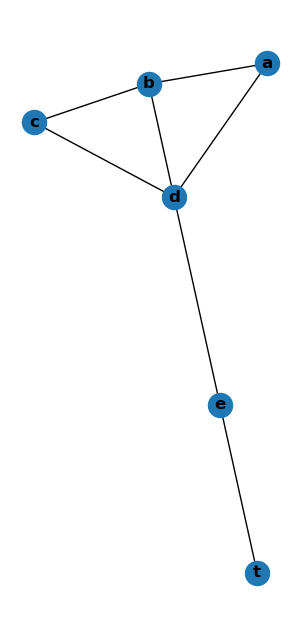

In [15]:

C=nx.Graph()
E=nx.Graph()
F=nx.Graph()
C.add_weighted_edges_from([("t", "e", 1.0), ("e", "d", 1.0),("d", "a", 1.0), ("d", "c", 1.0),("a", "b", 1.0),("c", "b", 1.0), ("b","d",2.1)]) #
E.add_weighted_edges_from([(1,2, 1.0), (2, 3, 1.0),(3, 1, 1.0), (3, 4, 1.0),(4, "b", 1.0),(1, "a", 1.0)])
F.add_weighted_edges_from([(1,2, 1.0), (2, 3, 1.0),(3, 1, 1.0), (3, 4, 1.0),(4, "b", 1.0),(1, "a", 1.0)])
plt.subplots(figsize=(8,8))
plt.subplot(121)
print("---------------- layer")
nx.draw(C, with_labels=True, font_weight='bold')

In [16]:

Stretch_closeness_centrality(C,Stretch=1.2,distance="weight")

{'t': 0.3816793893129771,
 'e': 0.5494505494505495,
 'd': 0.7042253521126761,
 'a': 0.5555555555555556,
 'c': 0.5555555555555556,
 'b': 0.4424778761061947}

In [17]:
nx.closeness_centrality(C,distance="weight")

{'t': 0.38461538461538464,
 'e': 0.5555555555555556,
 'd': 0.7142857142857143,
 'a': 0.5555555555555556,
 'c': 0.5555555555555556,
 'b': 0.45454545454545453}

In [18]:
Stretch_Edge_Betweenless_Centrality(C,1.05)

{('t', 'e'): 0.3333333333333333,
 ('e', 'd'): 0.5333333333333333,
 ('d', 'a'): 0.3,
 ('d', 'c'): 0.3,
 ('d', 'b'): 0.06666666666666667,
 ('a', 'b'): 0.16666666666666666,
 ('c', 'b'): 0.16666666666666666}

In [19]:
nx.edge_betweenness_centrality(C,weight="weight")

{('t', 'e'): 0.3333333333333333,
 ('e', 'd'): 0.5333333333333333,
 ('d', 'a'): 0.3333333333333333,
 ('d', 'c'): 0.3333333333333333,
 ('d', 'b'): 0.0,
 ('a', 'b'): 0.2,
 ('c', 'b'): 0.2}

----------------ÜST KATMAN


C:\Users\bagso\AppData\Local\Temp\ipykernel_18264\3117115282.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


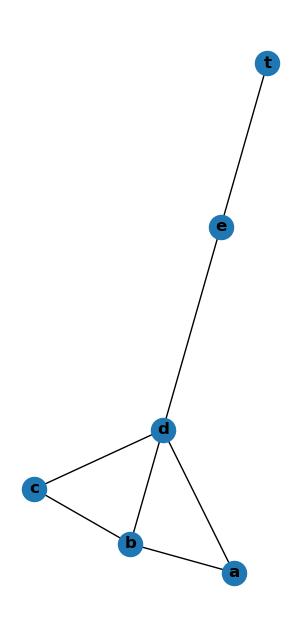

In [20]:
Y=nx.Graph()

Y.add_weighted_edges_from([("t", "e", 1.0), ("e", "d", 1.0),("d", "a", 1.0), ("d", "c", 1.0),("a", "b", 1.0),("c", "b", 1.0), ("b","d",1.9)]) #

plt.subplots(figsize=(8,8))
plt.subplot(121)
print("----------------ÜST KATMAN")
nx.draw(Y, with_labels=True, font_weight='bold')

In [21]:
Stretch_Edge_Betweenless_Centrality(Y,1.2)

{('t', 'e'): 0.3333333333333333,
 ('e', 'd'): 0.5333333333333333,
 ('d', 'a'): 0.3,
 ('d', 'c'): 0.3,
 ('d', 'b'): 0.06666666666666667,
 ('a', 'b'): 0.16666666666666666,
 ('c', 'b'): 0.16666666666666666}

In [22]:
nx.edge_betweenness_centrality(Y,weight="weight")

{('t', 'e'): 0.3333333333333333,
 ('e', 'd'): 0.5333333333333333,
 ('d', 'a'): 0.23333333333333334,
 ('d', 'c'): 0.23333333333333334,
 ('d', 'b'): 0.2,
 ('a', 'b'): 0.1,
 ('c', 'b'): 0.1}

In [23]:
nx.closeness_centrality(Y,distance="weight")

{'t': 0.38759689922480617,
 'e': 0.5617977528089887,
 'd': 0.7246376811594203,
 'a': 0.5555555555555556,
 'c': 0.5555555555555556,
 'b': 0.4672897196261683}

In [24]:
Stretch_closeness_centrality(Y,Stretch=-1,distance="weight")

{'t': 0.38759689922480617,
 'e': 0.5617977528089887,
 'd': 0.7246376811594203,
 'a': 0.5555555555555556,
 'c': 0.5555555555555556,
 'b': 0.4672897196261683}

# REAL DATA ANALYASIS 

# COMPARE GAS NETWORK BETWEENLESS AND STREACH BETWEENLESS VALUES

In [116]:
Gas = pd.read_csv("GasArcs.csv")

In [117]:
gas_weight=Gas["Length (ft)"]

In [118]:
gas_weight_norm =gas_weight/gas_weight.max()

In [119]:
gas_weight_norm

0     0.324464
1     0.230685
2     1.000000
3     0.072637
4     0.129158
5     0.154589
6     0.107891
7     0.137855
8     0.577450
9     0.562371
10    0.469359
11    0.182729
12    0.069297
13    0.068621
14    0.305027
15    0.081259
16    0.229706
Name: Length (ft), dtype: float64

In [120]:
Gas

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,c_t7,u_t8,f_t8,c_t8,u_t9,f_t9,c_t9,u_t10,f_t10,c_t10
0,0,41143.853700,12.541,Gas pipe,9,0,85.8,41144,41144,85.8,...,41144,85.8,41144,41144,85.8,41144,41144,85.8,41144,41144
1,1,29252.153650,8.916,Gas pipe,0,3,208.3,29252,29252,208.3,...,29252,208.3,29252,29252,208.3,29252,29252,208.3,29252,29252
2,2,126805.796400,38.650,Gas pipe,0,5,28.2,126806,126806,28.2,...,126806,28.2,126806,126806,28.2,126806,126806,28.2,126806,126806
3,3,9210.738880,2.807,Gas pipe,5,1,437.3,9211,9211,437.3,...,9211,437.3,9211,9211,437.3,9211,9211,437.3,9211,9211
4,4,16378.001970,4.992,Gas pipe,1,13,265.4,16378,16378,265.4,...,16378,265.4,16378,16378,265.4,16378,16378,265.4,16378,16378
5,5,19602.816830,5.975,Gas pipe,13,7,222.2,19603,19603,222.2,...,19603,222.2,19603,19603,222.2,19603,19603,222.2,19603,19603
6,6,13681.209830,4.170,Gas pipe,7,8,201.1,13681,13681,201.1,...,13681,201.1,13681,13681,201.1,13681,13681,201.1,13681,13681
7,7,17480.819470,5.328,Gas pipe,8,15,129.2,17481,17481,129.2,...,17481,129.2,17481,17481,129.2,17481,17481,129.2,17481,17481
8,8,73223.959730,22.319,Gas pipe,5,4,143.4,73224,73224,143.4,...,73224,143.4,73224,73224,143.4,73224,73224,143.4,73224,73224
9,9,71311.881980,21.736,Gas pipe,4,10,1.0,71312,71312,1.0,...,71312,1.0,71312,71312,1.0,71312,71312,1.0,71312,71312


In [121]:
data1=[]
edge=[]
for i in range(len(Gas)):
    data1.append((Gas["Start Node"][i],Gas["End Node"][i],gas_weight_norm[i]))
    edge.append((Gas["Start Node"][i],Gas["End Node"][i]))

In [122]:
Gas["Edges"]=edge

In [123]:
data1

[(9, 0, 0.32446350930374346),
 (0, 3, 0.23068467278677174),
 (0, 5, 1.0),
 (5, 1, 0.07263657609897713),
 (1, 13, 0.12915814919324933),
 (13, 7, 0.1545892805102086),
 (7, 8, 0.1078910445611144),
 (8, 15, 0.1378550505282738),
 (5, 4, 0.5774496261907472),
 (4, 10, 0.5623708379627352),
 (10, 5, 0.46935908002388443),
 (10, 2, 0.1827286079802579),
 (2, 11, 0.06929694929939337),
 (11, 12, 0.06862051138066115),
 (11, 6, 0.30502716356899906),
 (6, 13, 0.08125944674876076),
 (13, 14, 0.22970604189194618)]

C:\Users\bagso\AppData\Local\Temp\ipykernel_18264\2244540307.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Gas Network


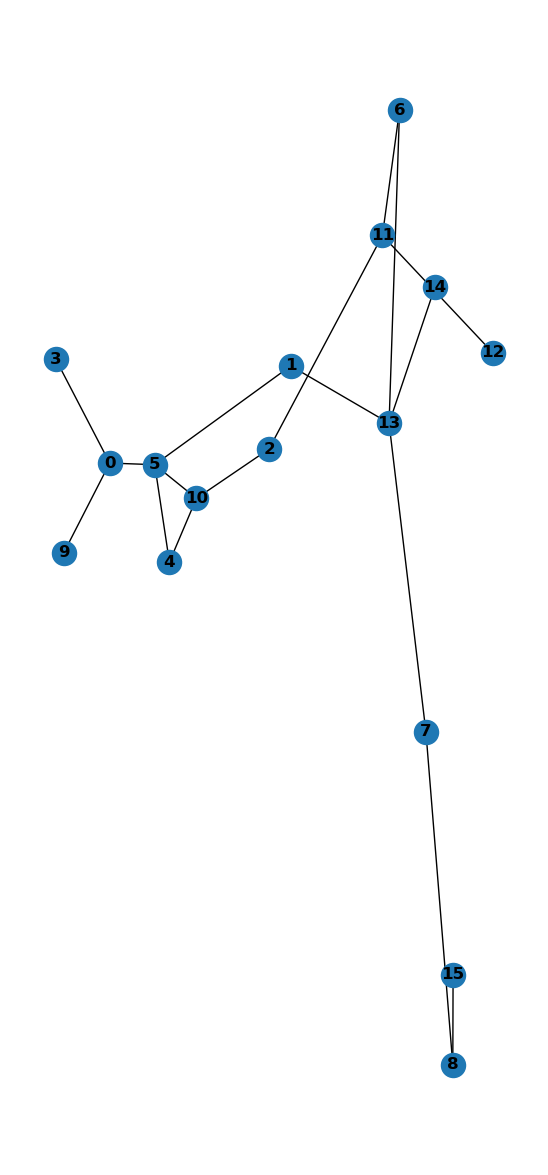

In [124]:
C=nx.Graph()
C.add_weighted_edges_from(data1) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Gas Network")
nx.draw(C, with_labels=True, font_weight='bold')

# Closeness Cetrality and Streach Betweenles Cetrality values Corelaltion according to u_to and f_t0


## Rates represent 5% expansion


In [126]:
CC=nx.closeness_centrality(C, distance="weight")
SCC95=Stretch_closeness_centrality(C,Stretch=1.05,distance="weight")
SCC90=Stretch_closeness_centrality(C,Stretch=1.1,distance="weight")
SCC85=Stretch_closeness_centrality(C,Stretch=1.15,distance="weight")
SCC80=Stretch_closeness_centrality(C,Stretch=1.2,distance="weight")


In [127]:
ALL_SCORE_SCC=scc_calculate(CC,Gas)
ALL_SCORE_SCC["Edges_Score_95"],ALL_SCORE_SCC["Edges_Score_90"],ALL_SCORE_SCC["Edges_Score_85"],ALL_SCORE_SCC["Edges_Score_80"]=scc_calculate(SCC95,Gas)["Edges_Score"],scc_calculate(SCC90,Gas)["Edges_Score"],scc_calculate(SCC85,Gas)["Edges_Score"],scc_calculate(SCC80, Gas)["Edges_Score"]

In [72]:
SCC={}
SCC=SCC95,SCC95,SCC95,SCC95


In [75]:
def scc_calculate(SCC95,Gas):
    
    SCC95_df=pd.DataFrame()
    SCC95_df["Start Node"],SCC95_df["End Node"]=Gas["Start Node"],Gas["End Node"]
    from95=[]
    to95=[]
    for i in range(len(SCC95_df)):
        from95.append(SCC95[SCC95_df["Start Node"][i]])
        to95.append(SCC95[SCC95_df["End Node"][i]])

    SCC95_df["Start Node clossness"], SCC95_df["End Node clossness"]= from95,  to95
    SCC95_df["Edges_Score"]=(SCC95_df["Start Node clossness"]+SCC95_df["End Node clossness"])/2
    edge=[]
    for i in range(len(SCC95_df)):
        edge.append((SCC95_df["Start Node"][i],SCC95_df["End Node"][i]))

    SCC95_df["Edges"]=edge   

    SCC_df_1=pd.DataFrame()
    SCC_df_1["Edges"], SCC_df_1["Edges_Score"]= SCC95_df["Edges"], SCC95_df["Edges_Score"]


    for i in range(len(Gas)):
        Gas["Start Node"][i] 
        Gas["End Node"][i]





    closs_jon = pd.merge(Gas, 
                          SCC_df_1, 
                          on ='Edges', 
                          how ='inner')
    closs_jon
    SCC095=closs_jon.drop(["Edges"], axis=1)
    
    return(SCC095)

In [133]:
ALL_SCORE_SCC=scc_calculate(CC,Gas)
ALL_SCORE_SCC["Edges_Score_95"],ALL_SCORE_SCC["Edges_Score_90"],ALL_SCORE_SCC["Edges_Score_85"],ALL_SCORE_SCC["Edges_Score_80"]=scc_calculate(SCC95,Gas)["Edges_Score"],scc_calculate(SCC90,Gas)["Edges_Score"],scc_calculate(SCC85,Gas)["Edges_Score"],scc_calculate(SCC80, Gas)["Edges_Score"]

In [134]:
ALL_SCORE_SCC

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,f_t9,c_t9,u_t10,f_t10,c_t10,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
0,0,41143.853700,12.541,Gas pipe,9,0,85.8,41144,41144,85.8,...,41144,41144,85.8,41144,41144,0.716390,0.716390,0.716390,0.716390,0.716390
1,1,29252.153650,8.916,Gas pipe,0,3,208.3,29252,29252,208.3,...,29252,29252,208.3,29252,29252,0.735353,0.735353,0.735353,0.735353,0.735353
2,2,126805.796400,38.650,Gas pipe,0,5,28.2,126806,126806,28.2,...,126806,126806,28.2,126806,126806,1.238297,1.238297,1.238297,1.238297,1.238297
3,3,9210.738880,2.807,Gas pipe,5,1,437.3,9211,9211,437.3,...,9211,9211,437.3,9211,9211,1.711224,1.711224,1.711224,1.711224,1.711224
4,4,16378.001970,4.992,Gas pipe,1,13,265.4,16378,16378,265.4,...,16378,16378,265.4,16378,16378,1.769438,1.765905,1.765905,1.765905,1.765905
5,5,19602.816830,5.975,Gas pipe,13,7,222.2,19603,19603,222.2,...,19603,19603,222.2,19603,19603,1.659011,1.652963,1.652963,1.652963,1.652963
6,6,13681.209830,4.170,Gas pipe,7,8,201.1,13681,13681,201.1,...,13681,13681,201.1,13681,13681,1.430257,1.425776,1.425776,1.425776,1.425776
7,7,17480.819470,5.328,Gas pipe,8,15,129.2,17481,17481,129.2,...,17481,17481,129.2,17481,17481,1.243466,1.240069,1.240069,1.240069,1.240069
8,8,73223.959730,22.319,Gas pipe,5,4,143.4,73224,73224,143.4,...,73224,73224,143.4,73224,73224,1.331130,1.331130,1.331130,1.331130,1.331130
9,9,71311.881980,21.736,Gas pipe,4,10,1.0,71312,71312,1.0,...,71312,71312,1.0,71312,71312,1.109882,1.101567,1.101567,1.101567,1.101567


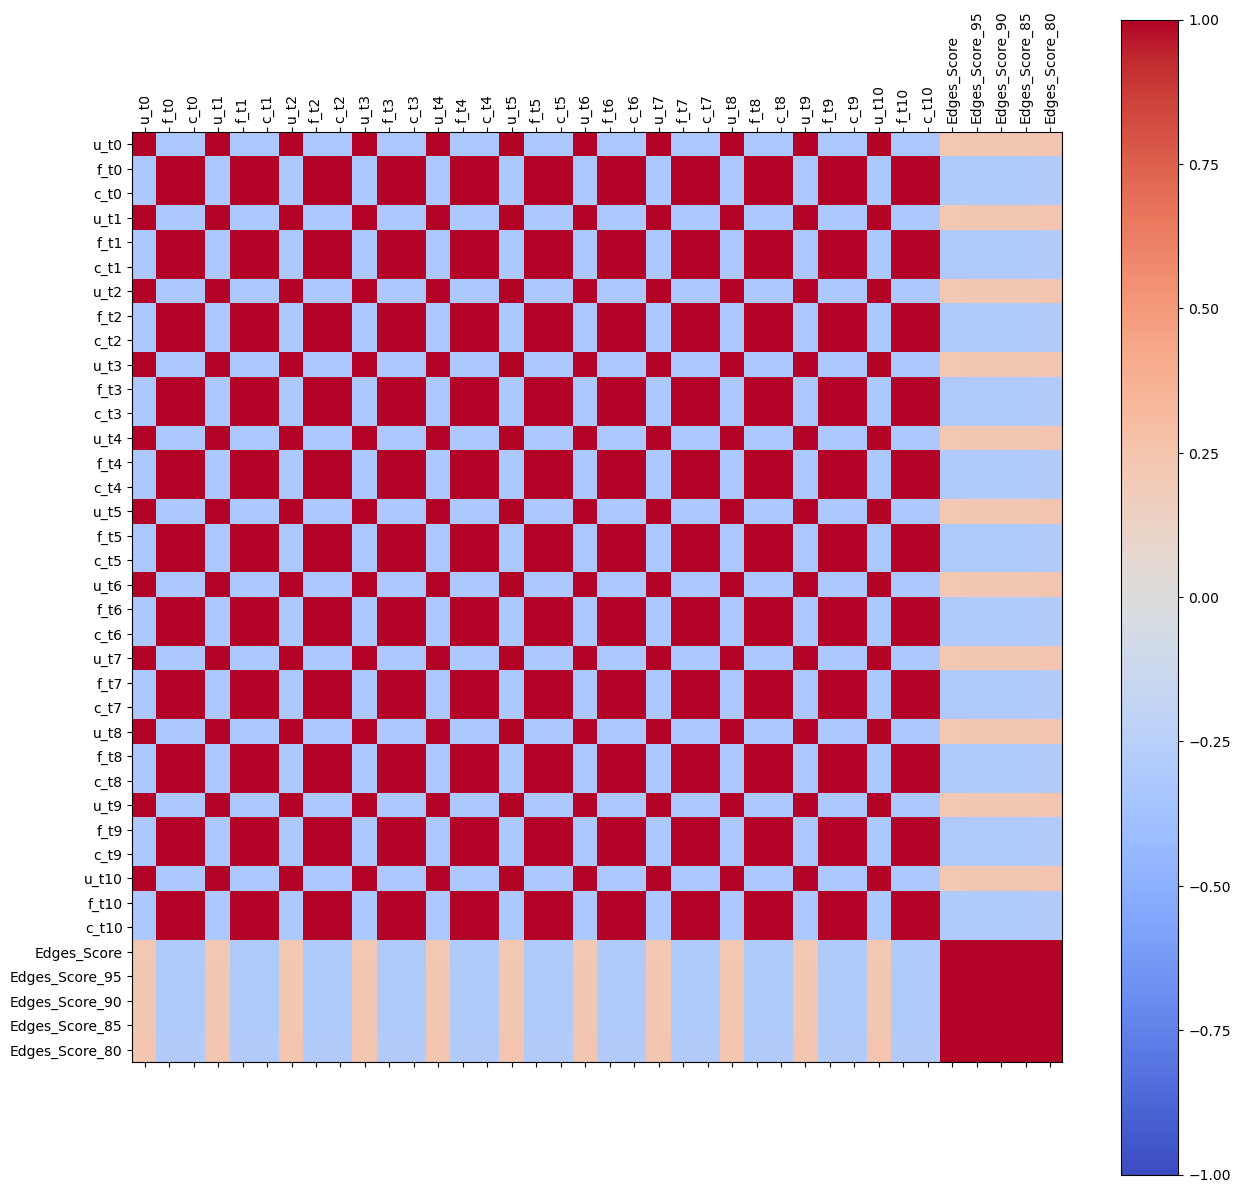

In [136]:
data=ALL_SCORE_SCC[ALL_SCORE_SCC.columns[6:]]
#data=inner_join.drop
corr = data.corr()
#fig=plt.subplots(figsize=(15,15))
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [137]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.216376,0.21943,0.21943,0.21943,0.237935
f_t0,-0.302052,-0.30253,-0.30253,-0.30253,-0.287899


In [138]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.216376,0.21943,0.21943,0.21943,0.237935
f_t0,-0.302052,-0.30253,-0.30253,-0.30253,-0.287899


In [139]:
# Yukarıda clossnes ile esnetilmiş clossnes ın kenar için üretilmiş değerlerde u_t10 ve f_10 değerlerini nasıl etkiledikleri dösterilmiştir.

In [140]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.216376,0.21943,0.21943,0.21943,0.237935
f_t0,-0.302052,-0.30253,-0.30253,-0.30253,-0.287899



# Betweenles Cetrality and Streach Betweenles Cetrality values Corelaltion according to  u_to and f_t0 

In [141]:
BC=nx.edge_betweenness_centrality(C,weight="weight")
BC

{(9, 0): 0.125,
 (0, 3): 0.125,
 (0, 5): 0.325,
 (5, 1): 0.36666666666666664,
 (5, 4): 0.09166666666666666,
 (5, 10): 0.075,
 (1, 13): 0.39166666666666666,
 (13, 7): 0.325,
 (13, 6): 0.35,
 (13, 14): 0.125,
 (7, 8): 0.23333333333333334,
 (8, 15): 0.125,
 (4, 10): 0.03333333333333333,
 (10, 2): 0.13333333333333333,
 (2, 11): 0.15833333333333333,
 (11, 12): 0.125,
 (11, 6): 0.2916666666666667}

In [142]:
SEBC95=Stretch_Edge_Betweenless_Centrality(C,1.05)
SEBC90=Stretch_Edge_Betweenless_Centrality(C,1.1)
SEBC85=Stretch_Edge_Betweenless_Centrality(C,1.15)
SEBC80=Stretch_Edge_Betweenless_Centrality(C,1.2)

In [143]:
SEBC95

{(9, 0): 0.125,
 (0, 3): 0.125,
 (0, 5): 0.325,
 (5, 1): 0.4041666666666667,
 (5, 4): 0.09166666666666666,
 (5, 10): 0.07916666666666666,
 (1, 13): 0.42916666666666664,
 (13, 7): 0.325,
 (13, 6): 0.3458333333333333,
 (13, 14): 0.125,
 (7, 8): 0.23333333333333334,
 (8, 15): 0.125,
 (4, 10): 0.03333333333333333,
 (10, 2): 0.09583333333333333,
 (2, 11): 0.15416666666666667,
 (11, 12): 0.125,
 (11, 6): 0.2875}

In [62]:
Gas

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,c_t7,u_t8,f_t8,c_t8,u_t9,f_t9,c_t9,u_t10,f_t10,c_t10
0,0,41143.853700,12.541,Gas pipe,9,0,85.8,41144,41144,85.8,...,41144,85.8,41144,41144,85.8,41144,41144,85.8,41144,41144
1,1,29252.153650,8.916,Gas pipe,0,3,208.3,29252,29252,208.3,...,29252,208.3,29252,29252,208.3,29252,29252,208.3,29252,29252
2,2,126805.796400,38.650,Gas pipe,0,5,28.2,126806,126806,28.2,...,126806,28.2,126806,126806,28.2,126806,126806,28.2,126806,126806
3,3,9210.738880,2.807,Gas pipe,5,1,437.3,9211,9211,437.3,...,9211,437.3,9211,9211,437.3,9211,9211,437.3,9211,9211
4,4,16378.001970,4.992,Gas pipe,1,13,265.4,16378,16378,265.4,...,16378,265.4,16378,16378,265.4,16378,16378,265.4,16378,16378
5,5,19602.816830,5.975,Gas pipe,13,7,222.2,19603,19603,222.2,...,19603,222.2,19603,19603,222.2,19603,19603,222.2,19603,19603
6,6,13681.209830,4.170,Gas pipe,7,8,201.1,13681,13681,201.1,...,13681,201.1,13681,13681,201.1,13681,13681,201.1,13681,13681
7,7,17480.819470,5.328,Gas pipe,8,15,129.2,17481,17481,129.2,...,17481,129.2,17481,17481,129.2,17481,17481,129.2,17481,17481
8,8,73223.959730,22.319,Gas pipe,5,4,143.4,73224,73224,143.4,...,73224,143.4,73224,73224,143.4,73224,73224,143.4,73224,73224
9,9,71311.881980,21.736,Gas pipe,4,10,1.0,71312,71312,1.0,...,71312,1.0,71312,71312,1.0,71312,71312,1.0,71312,71312


In [64]:
All_score=pd.DataFrame()
All_score["Edges"],All_score["BC"],All_score["SEBC95"],All_score["SEBC90"],All_score["SEBC85"],All_score["SEBC80"]=list(BC.keys()),list(BC.values()),list(SEBC95.values()),list(SEBC90.values()),list(SEBC85.values()),list(SEBC80.values())

In [65]:
All_score

,Edges,BC,SEBC95,SEBC90,SEBC85,SEBC80
0,"(t, e)",0.333333,0.333333,0.333333,0.333333,0.333333
1,"(e, d)",0.533333,0.533333,0.533333,0.533333,0.533333
2,"(d, a)",0.333333,0.300000,0.300000,0.300000,0.300000
3,"(d, c)",0.333333,0.300000,0.300000,0.300000,0.300000
4,"(d, b)",0.000000,0.066667,0.066667,0.066667,0.066667
5,"(a, b)",0.200000,0.166667,0.166667,0.166667,0.166667
6,"(c, b)",0.200000,0.166667,0.166667,0.166667,0.166667


In [66]:

import pandas as pd
  

  
inner_join = pd.merge(Gas, 
                      All_score, 
                      on ='Edges', 
                      how ='inner')
inner_join



KeyError: 'Edges'

In [142]:
import numpy
print(numpy.corrcoef(inner_join["BC"],inner_join["SEBC95"]))

[[1.       0.993446]
 [0.993446 1.      ]]


In [143]:


#data=inner_join[inner_join.columns[6:]]

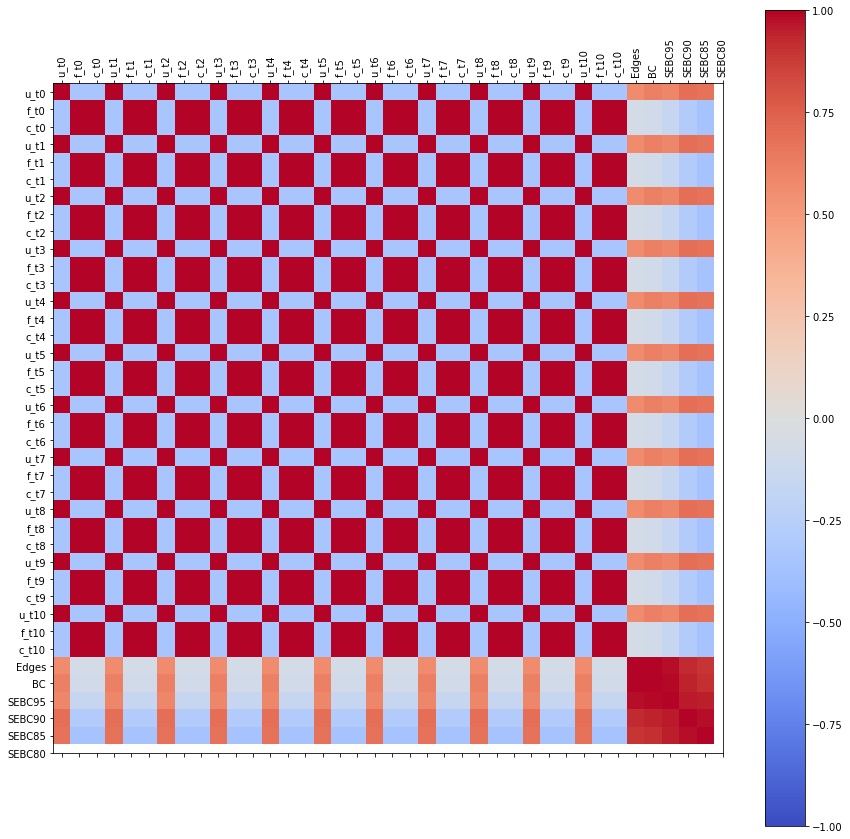

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=inner_join[inner_join.columns[6:]]

corr = data.corr()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


In [145]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,BC,SEBC95,SEBC90,SEBC85,SEBC80
u_t0,0.564321,0.615842,0.582725,0.693624,0.676915
f_t0,-0.064026,-0.078476,-0.155317,-0.281549,-0.358092


In [146]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,BC,SEBC95,SEBC90,SEBC85,SEBC80
u_t0,0.564321,0.615842,0.582725,0.693624,0.676915
f_t0,-0.064026,-0.078476,-0.155317,-0.281549,-0.358092


# POWERARCS

In [77]:
Power = pd.read_csv("PowerArcs.csv")

In [78]:
Power

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,c_t7,u_t8,f_t8,c_t8,u_t9,f_t9,c_t9,u_t10,f_t10,c_t10
0,0,22073.093720,6.728,Transmission Line,71,7,16.8,22073,22073,16.8,...,22073,16.8,22073,22073,16.8,22073,22073,16.8,22073,22073
1,1,21811.255520,6.648,Transmission Line,71,70,1.0,21811,21811,1.0,...,21811,1.0,21811,21811,1.0,21811,21811,1.0,21811,21811
2,2,29512.680030,8.995,Transmission Line,71,68,16.8,29513,29513,16.8,...,29513,16.8,29513,29513,16.8,29513,29513,16.8,29513,29513
3,3,9311.764139,2.838,Transmission Line,1,31,58.2,9312,9312,58.2,...,9312,58.2,9312,9312,58.2,9312,9312,58.2,9312,9312
4,4,13483.946030,4.110,Transmission Line,12,10,85.0,13484,13484,85.0,...,13484,85.0,13484,13484,85.0,13484,13484,85.0,13484,13484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,6013.836266,1.833,Transmission Line,14,58,55.2,6014,6014,55.2,...,6014,55.2,6014,6014,55.2,6014,6014,55.2,6014,6014
89,89,13590.392370,4.142,Transmission Line,49,23,41.7,13590,13590,41.7,...,13590,41.7,13590,13590,41.7,13590,13590,41.7,13590,13590
90,90,6404.814622,1.952,Transmission Line,41,6,9.8,6405,6405,9.8,...,6405,9.8,6405,6405,9.8,6405,6405,9.8,6405,6405
91,91,4206.344961,1.282,Transmission Line,42,6,1.0,4206,4206,1.0,...,4206,1.0,4206,4206,1.0,4206,4206,1.0,4206,4206


In [79]:
power_weight=Power["Length (km)"]

power_weight_norm =power_weight/power_weight.max()

In [80]:
power_weight_norm

0     0.419451
1     0.414464
2     0.560786
3     0.176933
4     0.256234
        ...   
88    0.114277
89    0.258229
90    0.121696
91    0.079925
92    0.075000
Name: Length (km), Length: 93, dtype: float64

In [81]:
data2=[]
edge2=[]
for i in range(len(Power)):
    data2.append((Power["Start Node"][i],Power["End Node"][i],power_weight_norm[i]))
    edge2.append((Power["Start Node"][i],Power["End Node"][i]))

In [82]:
Power["Edges"]=edge2

Power Network


C:\Users\bagso\AppData\Local\Temp\ipykernel_18264\2979816100.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


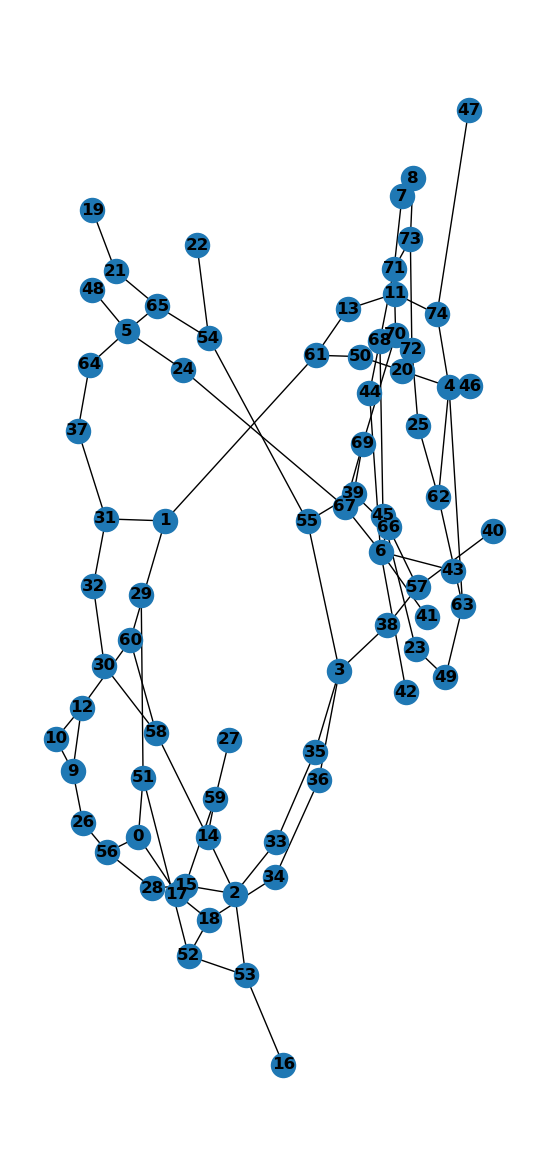

In [83]:
C2=nx.Graph()
C2.add_weighted_edges_from(data2) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Power Network")
nx.draw(C2, with_labels=True, font_weight='bold')

# Clossnes  Centrality and streach Closeness centrality corelation according to u_t0	f_t0 

In [84]:
Power

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,u_t8,f_t8,c_t8,u_t9,f_t9,c_t9,u_t10,f_t10,c_t10,Edges
0,0,22073.093720,6.728,Transmission Line,71,7,16.8,22073,22073,16.8,...,16.8,22073,22073,16.8,22073,22073,16.8,22073,22073,"(71, 7)"
1,1,21811.255520,6.648,Transmission Line,71,70,1.0,21811,21811,1.0,...,1.0,21811,21811,1.0,21811,21811,1.0,21811,21811,"(71, 70)"
2,2,29512.680030,8.995,Transmission Line,71,68,16.8,29513,29513,16.8,...,16.8,29513,29513,16.8,29513,29513,16.8,29513,29513,"(71, 68)"
3,3,9311.764139,2.838,Transmission Line,1,31,58.2,9312,9312,58.2,...,58.2,9312,9312,58.2,9312,9312,58.2,9312,9312,"(1, 31)"
4,4,13483.946030,4.110,Transmission Line,12,10,85.0,13484,13484,85.0,...,85.0,13484,13484,85.0,13484,13484,85.0,13484,13484,"(12, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,6013.836266,1.833,Transmission Line,14,58,55.2,6014,6014,55.2,...,55.2,6014,6014,55.2,6014,6014,55.2,6014,6014,"(14, 58)"
89,89,13590.392370,4.142,Transmission Line,49,23,41.7,13590,13590,41.7,...,41.7,13590,13590,41.7,13590,13590,41.7,13590,13590,"(49, 23)"
90,90,6404.814622,1.952,Transmission Line,41,6,9.8,6405,6405,9.8,...,9.8,6405,6405,9.8,6405,6405,9.8,6405,6405,"(41, 6)"
91,91,4206.344961,1.282,Transmission Line,42,6,1.0,4206,4206,1.0,...,1.0,4206,4206,1.0,4206,4206,1.0,4206,4206,"(42, 6)"


In [85]:
PCC=nx.closeness_centrality(C2, distance="weight")
PSCC95=Stretch_closeness_centrality(C2,Stretch=1.05,distance="weight")
PSCC90=Stretch_closeness_centrality(C2,Stretch=1.1,distance="weight")
PSCC85=Stretch_closeness_centrality(C2,Stretch=1.15,distance="weight")
PSCC80=Stretch_closeness_centrality(C2,Stretch=1.2,distance="weight")


In [86]:
ALL_SCORE_PSCC=scc_calculate(PCC,Power)
ALL_SCORE_PSCC["Edges_Score_95"],ALL_SCORE_PSCC["Edges_Score_90"],ALL_SCORE_PSCC["Edges_Score_85"],ALL_SCORE_PSCC["Edges_Score_80"]=scc_calculate(PSCC95,Power)["Edges_Score"],scc_calculate(PSCC90,Power)["Edges_Score"],scc_calculate(PSCC85,Power)["Edges_Score"],scc_calculate(PSCC80,Power)["Edges_Score"]

In [87]:
ALL_SCORE_PSCC

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,f_t9,c_t9,u_t10,f_t10,c_t10,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
0,0,22073.093720,6.728,Transmission Line,71,7,16.8,22073,22073,16.8,...,22073,22073,16.8,22073,22073,0.517539,0.515497,0.512900,0.507408,0.506863
1,1,21811.255520,6.648,Transmission Line,71,70,1.0,21811,21811,1.0,...,21811,21811,1.0,21811,21811,0.610808,0.608721,0.604743,0.599877,0.599332
2,2,29512.680030,8.995,Transmission Line,71,68,16.8,29513,29513,16.8,...,29513,29513,16.8,29513,29513,0.592441,0.590621,0.587353,0.583404,0.583071
3,3,9311.764139,2.838,Transmission Line,1,31,58.2,9312,9312,58.2,...,9312,9312,58.2,9312,9312,0.784130,0.783678,0.780242,0.778525,0.776792
4,4,13483.946030,4.110,Transmission Line,12,10,85.0,13484,13484,85.0,...,13484,13484,85.0,13484,13484,0.637266,0.636277,0.631591,0.630660,0.629389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,88,6013.836266,1.833,Transmission Line,14,58,55.2,6014,6014,55.2,...,6014,6014,55.2,6014,6014,0.753806,0.752457,0.748593,0.743558,0.741992
91,89,13590.392370,4.142,Transmission Line,49,23,41.7,13590,13590,41.7,...,13590,13590,41.7,13590,13590,0.593273,0.591086,0.590244,0.588544,0.588544
92,90,6404.814622,1.952,Transmission Line,41,6,9.8,6405,6405,9.8,...,6405,6405,9.8,6405,6405,0.695679,0.695239,0.690516,0.686906,0.686906
93,91,4206.344961,1.282,Transmission Line,42,6,1.0,4206,4206,1.0,...,4206,4206,1.0,4206,4206,0.705095,0.704644,0.699773,0.696092,0.696092


In [88]:
data2=ALL_SCORE_PSCC[ALL_SCORE_PSCC.columns[6:]]
corr = data2.corr()

In [89]:
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.260992,0.262170,0.270447,0.269594,0.268657
f_t0,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190


# betweenles Centrality and streach betweenles centrality corelation according to u_t0	f_t0 

In [90]:
PBC=nx.edge_betweenness_centrality(C2,weight="weight")
PSEBC95=Stretch_Edge_Betweenless_Centrality(C2,1.05)
PSEBC90=Stretch_Edge_Betweenless_Centrality(C2,1.1)
PSEBC85=Stretch_Edge_Betweenless_Centrality(C2,1.15)
PSEBC80=Stretch_Edge_Betweenless_Centrality(C2,1.20)

In [91]:
All_score2=pd.DataFrame()
All_score2["Edges"],All_score2["PBC"],All_score2["PSEBC95"],All_score2["PSEBC90"],All_score2["PSEBC85"],All_score2["PSEBC80"]=list(PBC.keys()),list(PBC.values()),list(PSEBC95.values()),list(PSEBC90.values()),list(PSEBC85.values()),list(PSEBC80.values())

In [92]:
All_score2

,Edges,PBC,PSEBC95,PSEBC90,PSEBC85,PSEBC80
0,"(71, 7)",0.026306,0.024267,0.024672,0.024245,0.022531
1,"(71, 70)",0.037477,0.044616,0.044673,0.044980,0.040884
2,"(71, 68)",0.026306,0.026508,0.023380,0.021919,0.029386
3,"(71, 73)",0.010811,0.019814,0.016219,0.015158,0.015145
4,"(7, 8)",0.000360,0.000360,0.002294,0.003285,0.003555
...,...,...,...,...,...,...
87,"(51, 29)",0.026667,0.027502,0.044093,0.051571,0.057714
88,"(51, 0)",0.026667,0.022616,0.023604,0.025981,0.024456
89,"(0, 56)",0.027027,0.027105,0.024677,0.026590,0.029396
90,"(56, 26)",0.011171,0.011051,0.010484,0.008418,0.008017


In [93]:
Power["Edges"]=edge2

In [94]:
  
inner_join2 = pd.merge(Power, 
                      All_score2, 
                      on ='Edges', 
                      how ='inner')
inner_join2


,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,c_t9,u_t10,f_t10,c_t10,Edges,PBC,PSEBC95,PSEBC90,PSEBC85,PSEBC80
0,0,22073.093720,6.728,Transmission Line,71,7,16.8,22073,22073,16.8,...,22073,16.8,22073,22073,"(71, 7)",0.026306,0.024267,0.024672,0.024245,0.022531
1,1,21811.255520,6.648,Transmission Line,71,70,1.0,21811,21811,1.0,...,21811,1.0,21811,21811,"(71, 70)",0.037477,0.044616,0.044673,0.044980,0.040884
2,2,29512.680030,8.995,Transmission Line,71,68,16.8,29513,29513,16.8,...,29513,16.8,29513,29513,"(71, 68)",0.026306,0.026508,0.023380,0.021919,0.029386
3,3,9311.764139,2.838,Transmission Line,1,31,58.2,9312,9312,58.2,...,9312,58.2,9312,9312,"(1, 31)",0.155676,0.135730,0.111200,0.115164,0.130607
4,4,13483.946030,4.110,Transmission Line,12,10,85.0,13484,13484,85.0,...,13484,85.0,13484,13484,"(12, 10)",0.025586,0.024535,0.023062,0.019929,0.017661
5,6,12836.686720,3.913,Transmission Line,12,9,15.1,12837,12837,15.1,...,12837,15.1,12837,12837,"(12, 9)",0.041081,0.037950,0.034901,0.034413,0.034523
6,7,12949.962160,3.947,Transmission Line,36,3,27.5,12950,12950,27.5,...,12950,27.5,12950,12950,"(36, 3)",0.135495,0.131786,0.107826,0.093119,0.088247
7,9,6708.413327,2.045,Transmission Line,34,18,14.2,6708,6708,14.2,...,6708,14.2,6708,6708,"(34, 18)",0.128288,0.119856,0.102393,0.108499,0.123198
8,10,24085.456220,7.341,Transmission Line,18,17,1.0,24085,24085,1.0,...,24085,1.0,24085,24085,"(18, 17)",0.042883,0.046925,0.032040,0.026947,0.023079
9,12,8724.881713,2.659,Transmission Line,35,33,1.0,8725,8725,1.0,...,8725,1.0,8725,8725,"(35, 33)",0.095135,0.098506,0.085852,0.078596,0.082049


In [95]:
data2=inner_join2[inner_join2.columns[6:]]


In [96]:
data2=data2.drop(columns="Edges")


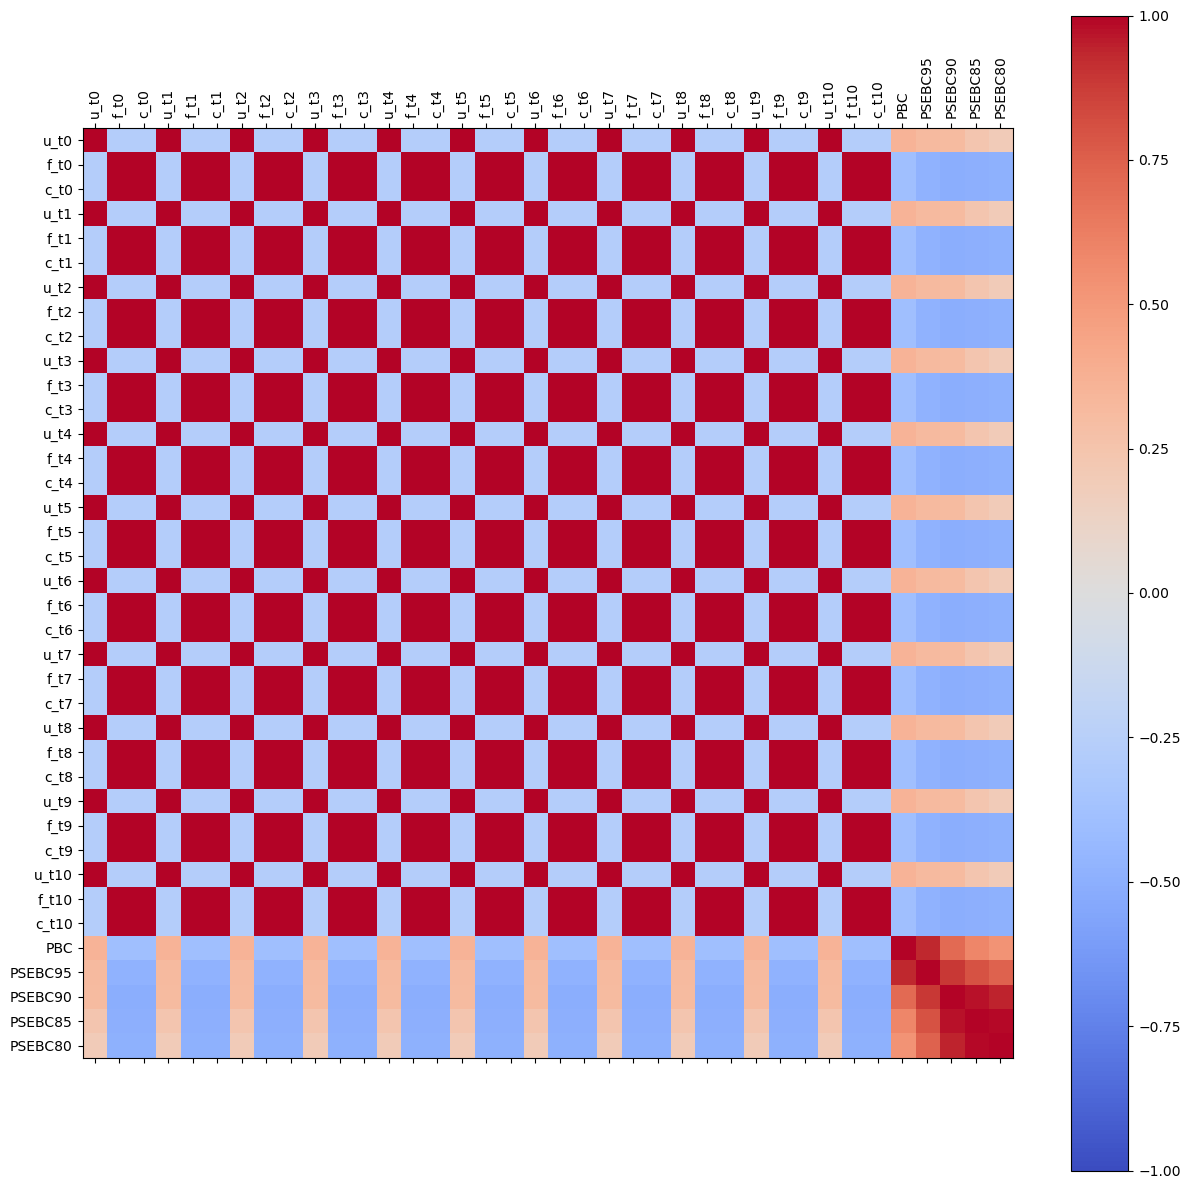

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



corr2 = data2.corr()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
cax = ax.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data2.columns)
ax.set_yticklabels(data2.columns)
plt.show()

In [98]:
corr[corr.columns[-5:]][0:2] # corelasyonda bir azalma görüldü

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.260992,0.262170,0.270447,0.269594,0.268657
f_t0,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190


In [99]:
corr[corr.columns[-5:]][0:2]

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.260992,0.262170,0.270447,0.269594,0.268657
f_t0,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190


In [100]:
corr[corr.columns[-5:]]

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.260992,0.262170,0.270447,0.269594,0.268657
f_t0,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
c_t0,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
u_t1,0.260992,0.262170,0.270447,0.269594,0.268657
f_t1,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
c_t1,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
u_t2,0.260992,0.262170,0.270447,0.269594,0.268657
f_t2,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
c_t2,-0.454287,-0.455349,-0.456978,-0.458095,-0.458190
u_t3,0.260992,0.262170,0.270447,0.269594,0.268657


# TelecommunicationArc

In [101]:
Tele = pd.read_csv("TelecommunicationArcs.csv")

In [102]:
Tele_weight=Tele["Length (km)"]

Tele_weight_norm =Tele_weight/Tele_weight.max()

In [103]:
data3=[]
edge3=[]
for i in range(len(Tele)):
    data3.append((Tele["Start Node"][i],Tele["End Node"][i],Tele_weight_norm[i]))
    edge3.append((Tele["Start Node"][i],Tele["End Node"][i]))

In [104]:
Tele["Edges"]=edge3

Telecommunication Network


C:\Users\bagso\AppData\Local\Temp\ipykernel_18264\3825247687.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


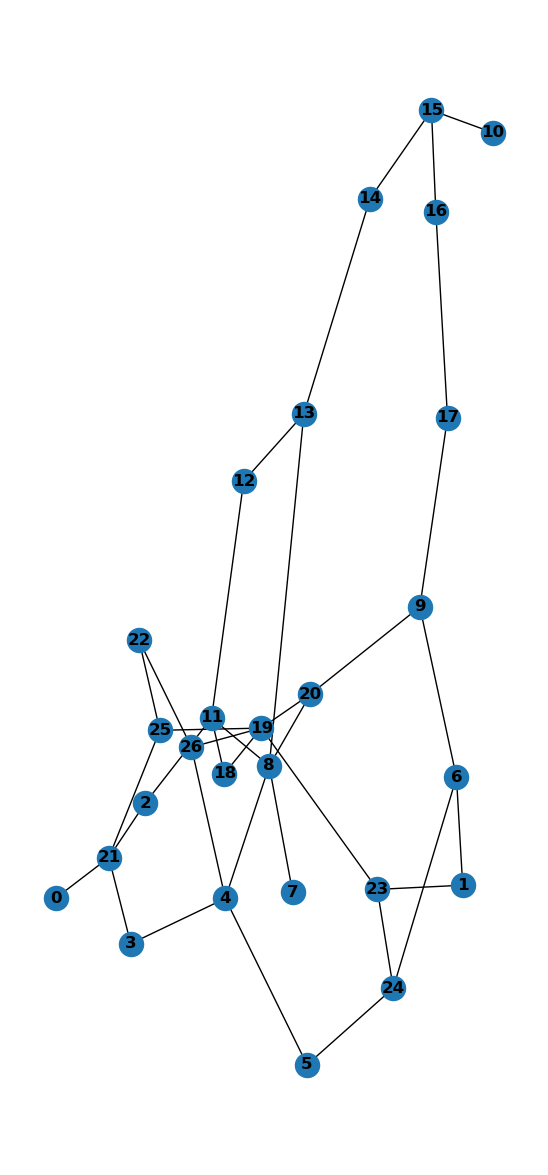

In [105]:
C3=nx.Graph()
C3.add_weighted_edges_from(data3) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Telecommunication Network")
nx.draw(C3, with_labels=True, font_weight='bold')

# Clossness AND STREACH clossness centrality  CORELATIN ACCORDING TO U_T0 AND F_T0¶

In [106]:
TCC=nx.closeness_centrality(C3, distance="weight")
TSCC95=Stretch_closeness_centrality(C3,Stretch=1.05,distance="weight")
TSCC90=Stretch_closeness_centrality(C3,Stretch=1.1,distance="weight")
TSCC85=Stretch_closeness_centrality(C3,Stretch=1.15,distance="weight")
TSCC80=Stretch_closeness_centrality(C3,Stretch=1.2,distance="weight")

In [107]:
ALL_SCORE_TSCC=scc_calculate(TCC,Tele)
ALL_SCORE_TSCC["Edges_Score_95"],ALL_SCORE_TSCC["Edges_Score_90"],ALL_SCORE_TSCC["Edges_Score_85"],ALL_SCORE_TSCC["Edges_Score_80"]=scc_calculate(TSCC95,Tele)["Edges_Score"],scc_calculate(TSCC90,Tele)["Edges_Score"],scc_calculate(TSCC85,Tele)["Edges_Score"],scc_calculate(TSCC80,Tele)["Edges_Score"]

In [108]:
data3=ALL_SCORE_TSCC[ALL_SCORE_TSCC.columns[6:]]
corr = data3.corr()
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.463364,0.462558,0.445009,0.444038,0.458706
f_t0,-0.372518,-0.372579,-0.368376,-0.353513,-0.350575


In [109]:
data3=ALL_SCORE_TSCC[ALL_SCORE_TSCC.columns[6:]]
corr = data3.corr()
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality value

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.463364,0.462558,0.445009,0.444038,0.458706
f_t0,-0.372518,-0.372579,-0.368376,-0.353513,-0.350575


# BETWENLESS AND STREACH BETWEENLESS CORELATIN ACCORDING TO U_T0 AND F_T0

In [179]:
TBC=nx.edge_betweenness_centrality(C3,weight="weight")
TSEBC95=Stretch_Edge_Betweenless_Centrality(C3,1.05)
TSEBC90=Stretch_Edge_Betweenless_Centrality(C3,1.1)
TSEBC85=Stretch_Edge_Betweenless_Centrality(C3,1.15)
TSEBC80=Stretch_Edge_Betweenless_Centrality(C3,1.20)

In [180]:
All_score3=pd.DataFrame()
All_score3["Edges"],All_score3["TBC"],All_score3["TSEBC95"],All_score3["TSEBC90"],All_score3["TSEBC85"],All_score3["TSEBC80"]=list(TBC.keys()),list(TBC.values()),list(TSEBC95.values()),list(TSEBC90.values()),list(TSEBC85.values()),list(TSEBC80.values())

In [181]:
All_score3

,Edges,TBC,TSEBC95,TSEBC90,TSEBC85,TSEBC80
0,"(4, 26)",0.199430,0.202754,0.195157,0.191151,0.188548
1,"(4, 5)",0.193732,0.168566,0.170078,0.155177,0.143744
2,"(4, 3)",0.142450,0.116572,0.110035,0.098999,0.092249
3,"(4, 8)",0.290598,0.259497,0.249549,0.242984,0.227392
4,"(26, 22)",0.062678,0.062678,0.062963,0.069890,0.083852
5,"(26, 19)",0.148148,0.141026,0.132669,0.140307,0.125867
6,"(23, 1)",0.079772,0.095442,0.074422,0.083073,0.095946
7,"(23, 24)",0.014245,0.018281,0.036531,0.047054,0.042393
8,"(23, 19)",0.111111,0.130817,0.121874,0.131070,0.120509
9,"(1, 6)",0.102564,0.113485,0.093890,0.076731,0.080025


In [182]:
Tele["Edges"]=edge3

In [183]:
inner_join3 = pd.merge(Tele, 
                      All_score3, 
                      on ='Edges', 
                      how ='inner')
inner_join3


,ID,Length (ft),Length (km),Start Node,End Node,Arc Type,u_t0,f_t0,c_t0,u_t1,...,c_t9,u_t10,f_t10,c_t10,Edges,TBC,TSEBC95,TSEBC90,TSEBC85,TSEBC80
0,0,34036.129110,10.374,4,26,Fiber Optic Cable,53.1,34036,34036,53.1,...,34036,53.1,34036,34036,"(4, 26)",0.199430,0.202754,0.195157,0.191151,0.188548
1,1,16740.545830,5.103,23,1,Fiber Optic Cable,20.7,16741,16741,20.7,...,16741,20.7,16741,16741,"(23, 1)",0.079772,0.095442,0.074422,0.083073,0.095946
2,2,38171.228440,11.635,1,6,Fiber Optic Cable,49.1,38171,38171,49.1,...,38171,49.1,38171,38171,"(1, 6)",0.102564,0.113485,0.093890,0.076731,0.080025
3,3,26940.531140,8.211,6,9,Fiber Optic Cable,410.1,26941,26941,410.1,...,26941,410.1,26941,26941,"(6, 9)",0.162393,0.185897,0.183974,0.165999,0.159232
4,4,29850.402210,9.098,9,17,Fiber Optic Cable,95.3,29850,29850,95.3,...,29850,95.3,29850,29850,"(9, 17)",0.142450,0.144349,0.148789,0.138821,0.140546
5,5,19292.736150,5.880,17,16,Fiber Optic Cable,94.8,19293,19293,94.8,...,19293,94.8,19293,19293,"(17, 16)",0.102564,0.103514,0.107953,0.097511,0.117600
6,9,19553.854630,5.960,14,13,Fiber Optic Cable,19.4,19554,19554,19.4,...,19554,19.4,19554,19554,"(14, 13)",0.170940,0.169041,0.164601,0.161811,0.163403
7,10,23388.543750,7.129,13,12,Fiber Optic Cable,64.9,23389,23389,64.9,...,23389,64.9,23389,23389,"(13, 12)",0.088319,0.103039,0.109418,0.115601,0.115987
8,11,17101.213030,5.212,12,11,Fiber Optic Cable,1.0,17101,17101,1.0,...,17101,1.0,17101,17101,"(12, 11)",0.042735,0.057455,0.067157,0.074291,0.078894
9,12,47425.343100,14.455,11,2,Fiber Optic Cable,29.9,47425,47425,29.9,...,47425,29.9,47425,47425,"(11, 2)",0.065527,0.075499,0.082067,0.083511,0.073732


In [184]:
data3=inner_join3[inner_join3.columns[6:]]

In [185]:
data3=data3.drop(columns="Edges")

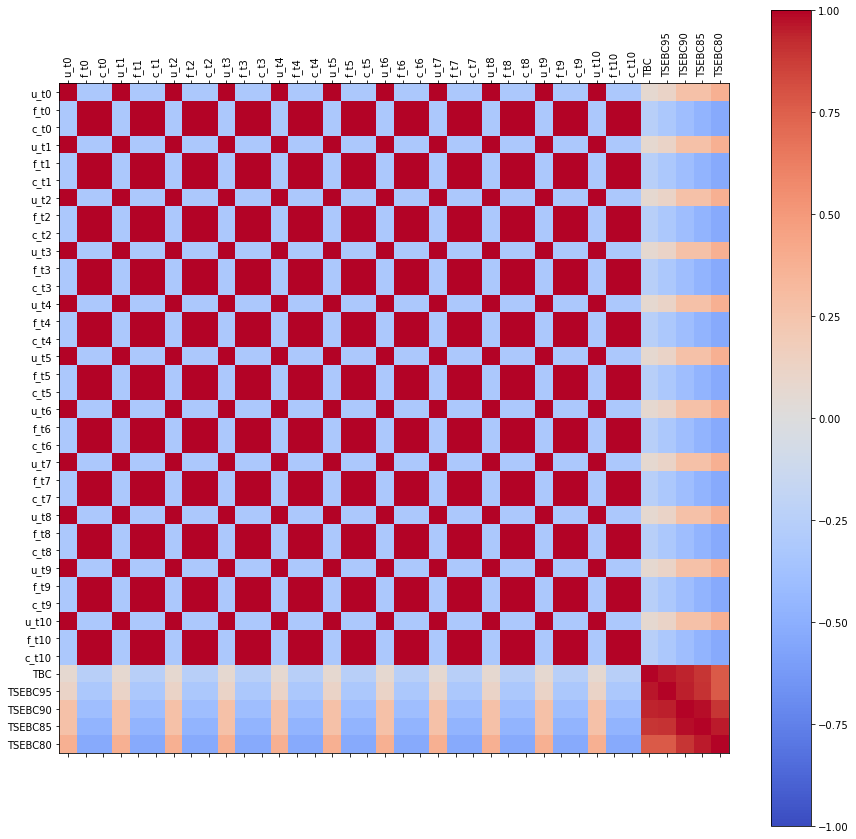

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr3 = data3.corr()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
cax = ax.matshow(corr3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data3.columns)
ax.set_yticklabels(data3.columns)
plt.show()

In [188]:
corr3[corr3.columns[-5:]][0:2] # corelasyonda bir azalma görüldü

,TBC,TSEBC95,TSEBC90,TSEBC85,TSEBC80
u_t0,0.067019,0.110498,0.268310,0.270440,0.379335
f_t0,-0.245983,-0.313856,-0.392034,-0.467183,-0.530384


In [88]:
corr3[corr3.columns[-5:]][0:2] # corelasyonda bir azalma görüldü

,TBC,TSEBC95,TSEBC90,TSEBC85,TSEBC80
u_t0,0.067019,0.188040,0.147189,0.101967,0.05398
f_t0,-0.245983,-0.356622,-0.411900,-0.446618,-0.43130


In [187]:
corr3[corr3.columns[-5:]][0:5] # diğer bağlantılardadad  temsil kabiliyetinin arttığı görüldü

,TBC,TSEBC95,TSEBC90,TSEBC85,TSEBC80
u_t0,0.067019,0.110498,0.268310,0.270440,0.379335
f_t0,-0.245983,-0.313856,-0.392034,-0.467183,-0.530384
c_t0,-0.245983,-0.313856,-0.392034,-0.467183,-0.530384
u_t1,0.067019,0.110498,0.268310,0.270440,0.379335
f_t1,-0.245983,-0.313856,-0.392034,-0.467183,-0.530384


# Water pipe Network 

In [189]:
Water= pd.read_csv("WaterArcs.csv")

In [190]:
Water_weight=Water["Length (km)"]

Water_weight_norm =Water_weight/Water_weight.max()

In [191]:
data4=[]
edge4=[]
for i in range(len(Water)):
    data4.append((Water["Start Node"][i],Water["End Node"][i],Water_weight_norm[i]))
    edge4.append((Water["Start Node"][i],Water["End Node"][i]))

In [192]:
Water["Edges"]=edge4

Water Network


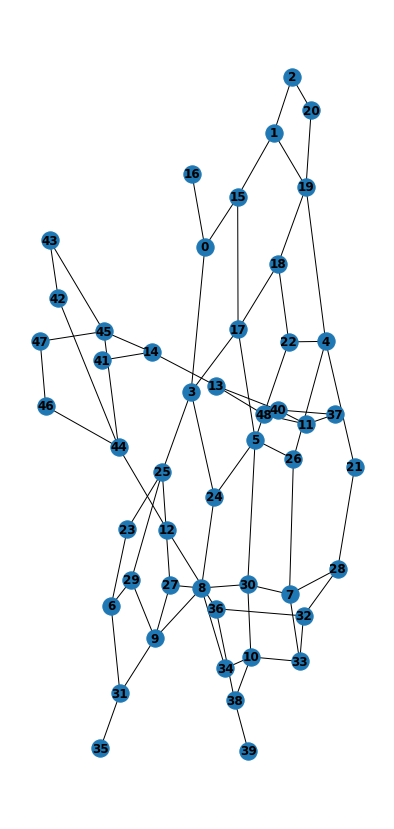

In [193]:
C4=nx.Graph()
C4.add_weighted_edges_from(data4) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Water Network")
nx.draw(C4, with_labels=True, font_weight='bold')

# Closeness AND STREACH BETWEENLESS CORELATIN ACCORDING TO U_T0 AND F_T0

In [194]:
WCC=nx.closeness_centrality(C4, distance="weight")
WSCC95=Stretch_closeness_centrality(C4,Stretch=1.05,distance="weight")
WSCC90=Stretch_closeness_centrality(C4,Stretch=1.1,distance="weight")
WSCC85=Stretch_closeness_centrality(C4,Stretch=1.15,distance="weight")
WSCC80=Stretch_closeness_centrality(C4,Stretch=1.2,distance="weight")


In [195]:
ALL_SCORE_WSCC=scc_calculate(WCC,Water)
ALL_SCORE_WSCC["Edges_Score_95"],ALL_SCORE_WSCC["Edges_Score_90"],ALL_SCORE_WSCC["Edges_Score_85"],ALL_SCORE_WSCC["Edges_Score_80"]=scc_calculate(WSCC95,Water)["Edges_Score"],scc_calculate(WSCC90,Water)["Edges_Score"],scc_calculate(WSCC85,Water)["Edges_Score"],scc_calculate(WSCC80,Water)["Edges_Score"]
data4=ALL_SCORE_WSCC[ALL_SCORE_WSCC.columns[6:]]
corr = data4.corr()
corr[corr.columns[-5:]][0:2]  # u_t10 parameter and corelation of betweenless centrality values 

,Edges_Score,Edges_Score_95,Edges_Score_90,Edges_Score_85,Edges_Score_80
u_t0,0.175526,0.176083,0.178584,0.169502,0.161394
f_t0,-0.047181,-0.046207,-0.038560,-0.055888,-0.058902


# BETWENLESS AND STREACH BETWEENLESS CORELATIN ACCORDING TO U_T0 AND F_T0

In [197]:
WBC=nx.edge_betweenness_centrality(C4,weight="weight")
WSEBC95=Stretch_Edge_Betweenless_Centrality(C4,1.05)
WSEBC90=Stretch_Edge_Betweenless_Centrality(C4,1.1)
WSEBC85=Stretch_Edge_Betweenless_Centrality(C4,1.15)
WSEBC80=Stretch_Edge_Betweenless_Centrality(C4,1.20)

In [198]:
All_score4=pd.DataFrame()
All_score4["Edges"],All_score4["WBC"],All_score4["WSEBC95"],All_score4["WSEBC90"],All_score4["WSEBC85"],All_score4["WSEBC80"]=list(WBC.keys()),list(WBC.values()),list(WSEBC95.values()),list(WSEBC90.values()),list(WSEBC85.values()),list(WSEBC80.values())

In [199]:
All_score4

,Edges,WBC,WSEBC95,WSEBC90,WSEBC85,WSEBC80
0,"(0, 16)",0.040816,0.038177,0.034952,0.033900,0.037925
1,"(0, 15)",0.005102,0.016325,0.022197,0.021666,0.021038
2,"(0, 3)",0.074830,0.058328,0.046444,0.045206,0.050327
3,"(15, 1)",0.030612,0.022683,0.019977,0.020714,0.020775
4,"(15, 17)",0.062925,0.065226,0.058447,0.068298,0.096822
...,...,...,...,...,...,...
66,"(43, 42)",0.000850,0.008659,0.015547,0.029786,0.039790
67,"(45, 14)",0.250000,0.243788,0.192068,0.111465,0.076601
68,"(45, 47)",0.007653,0.024943,0.079654,0.101275,0.102801
69,"(14, 41)",0.040816,0.040816,0.062300,0.072565,0.080988


In [200]:
#Water["Edges"]=edge4

In [201]:
inner_join4 = pd.merge(Water, 
                      All_score4, 
                      on ='Edges', 
                      how ='inner')
inner_join4

,ID,Length (ft),Length (km),Arc Type,Start Node,End Node,u_t0,f_t0,c_t0,u_t1,...,c_t9,u_t10,f_t10,c_t10,Edges,WBC,WSEBC95,WSEBC90,WSEBC85,WSEBC80
0,0,30773.496460,9.380,Water pipe,0,16,40.500,30773,30773,40.500,...,30773,40.500,30773,30773,"(0, 16)",0.040816,0.038177,0.034952,0.033900,0.037925
1,3,37132.879270,11.318,Water pipe,2,1,21.303,37133,37133,21.303,...,37133,21.303,37133,37133,"(2, 1)",0.039966,0.034563,0.029645,0.020814,0.018322
2,7,11289.598260,3.441,Water pipe,15,17,1.000,11290,11290,1.000,...,11290,1.000,11290,11290,"(15, 17)",0.062925,0.065226,0.058447,0.068298,0.096822
3,11,14822.243170,4.518,Water pipe,19,18,23.768,14822,14822,23.768,...,14822,23.768,14822,14822,"(19, 18)",0.045068,0.050967,0.046794,0.091010,0.134715
4,13,21000.034970,6.401,Water pipe,1,19,80.362,21000,21000,80.362,...,21000,80.362,21000,21000,"(1, 19)",0.048469,0.051988,0.051190,0.049791,0.063298
5,14,17755.741720,5.412,Water pipe,3,24,126.351,17756,17756,126.351,...,17756,126.351,17756,17756,"(3, 24)",0.084184,0.053713,0.046453,0.064763,0.077429
6,15,13023.871730,3.970,Water pipe,19,4,15.531,13024,13024,15.531,...,13024,15.531,13024,13024,"(19, 4)",0.136905,0.136905,0.114317,0.167685,0.214587
7,18,22376.901310,6.820,Water pipe,17,5,35.211,22377,22377,35.211,...,22377,35.211,22377,22377,"(17, 5)",0.066327,0.071450,0.071382,0.063553,0.098818
8,19,22585.643070,6.884,Water pipe,24,5,1.000,22586,22586,1.000,...,22586,1.000,22586,22586,"(24, 5)",0.090136,0.061295,0.038202,0.038473,0.048960
9,24,10952.841080,3.338,Water pipe,4,26,1.000,10953,10953,1.000,...,10953,1.000,10953,10953,"(4, 26)",0.159864,0.150247,0.174412,0.250134,0.255641


In [202]:
data4=inner_join4[inner_join4.columns[6:]]

In [203]:
data4=data4.drop(columns="Edges")

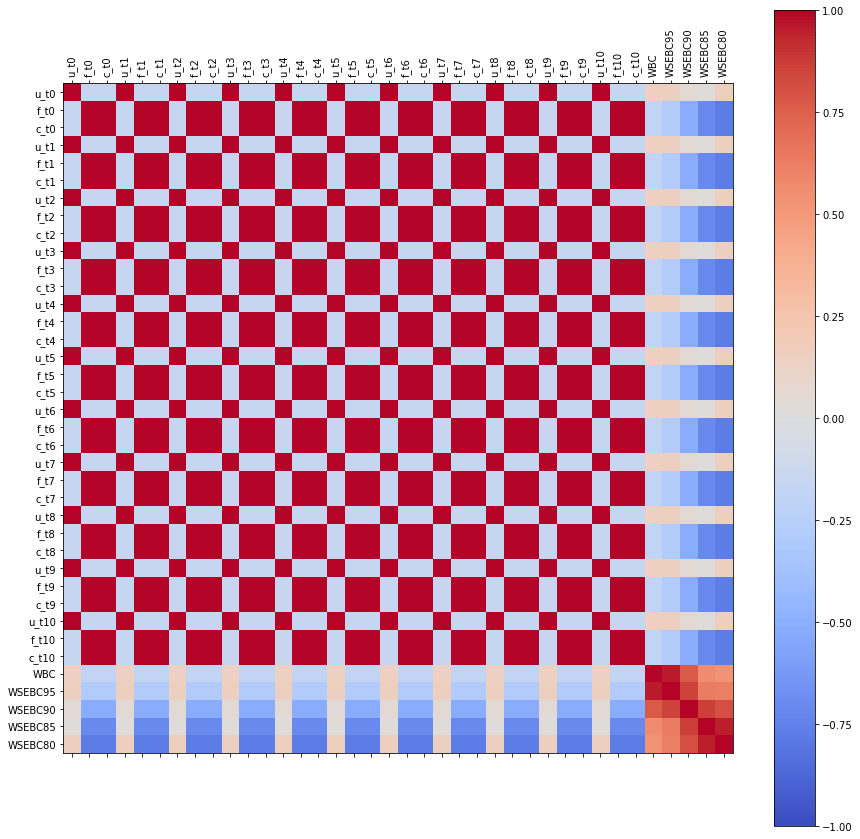

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



corr4 = data4.corr()

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)
cax = ax.matshow(corr4,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data4.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data4.columns)
ax.set_yticklabels(data4.columns)
plt.show()

In [111]:
corr4[corr4.columns[-5:]][0:1] # corelasyonda bir azalma görüldü

,WBC,WSEBC95,WSEBC90,WSEBC85,WSEBC80
u_t0,0.145402,0.161957,0.146659,0.131293,0.121829


In [112]:
corr4[corr4.columns[-5:]][0:2] # diğer bağlantılardadad  temsil kabiliyetinin arttığı görüldü

,WBC,WSEBC95,WSEBC90,WSEBC85,WSEBC80
u_t0,0.145402,0.161957,0.146659,0.131293,0.121829
f_t0,-0.188870,-0.205475,-0.185094,-0.170675,-0.156976


In [370]:
corr4[corr4.columns[-5:]][0:2] # diğer bağlantılardadad  temsil kabiliyetinin arttığı görüldü

,WBC,WSEBC95,WSEBC90,WSEBC85,WSEBC80
u_t0,0.145402,0.153327,0.042793,0.017482,0.154716
f_t0,-0.188870,-0.281869,-0.520322,-0.703435,-0.769229


# Traffic

In [256]:
Traffic= pd.read_csv("Traffic.csv")

In [207]:
Traffic

,Unnamed: 0,X1,Y1,X2,Y2,From_ID,To_ID,Edge_ID,Distance_km,Average_speed,Edge_Traffic
0,0,28.080210,41.198894,28.078731,41.200240,322.00099,321.98755,643.98854,0.193369,44,"(322.00099, 321.98755)"
1,1,28.037025,41.197294,28.028172,41.197783,321.56754,321.47950,643.04704,0.736801,99,"(321.56754, 321.4795)"
2,2,28.028122,41.197582,28.037035,41.197089,321.47880,321.56744,643.04624,0.741800,99,"(321.4788, 321.56744)"
3,3,28.088747,41.191622,28.084574,41.196397,322.07909,322.04214,644.12123,0.633160,55,"(322.07909, 322.04214)"
4,4,28.084418,41.196366,28.080557,41.195804,322.04055,322.00137,644.04192,0.326478,81,"(322.04055, 322.00137)"
...,...,...,...,...,...,...,...,...,...,...,...
22360,22360,29.273788,40.834981,29.291258,40.841103,333.57286,333.75368,667.32654,1.601345,59,"(333.57286, 333.75368)"
22361,22361,29.123072,41.052610,29.140351,41.081223,332.28333,332.48473,664.76806,3.484832,67,"(332.28333, 332.48473)"
22362,22362,28.608631,41.161816,28.702443,41.178884,327.24813,328.20331,655.45144,8.013568,46,"(327.24813, 328.20331)"
22363,22363,29.852690,41.127085,30.011030,41.046600,339.65399,341.15690,680.81089,15.891235,57,"(339.65399, 341.1569)"


In [208]:
Traffic_weight=Traffic["Distance_km"]

Traffic_weight_norm =Traffic_weight/Traffic_weight.max()

In [209]:
data5=[]
edge5=[]
for i in range(len(Traffic)):
    data5.append((Traffic["From_ID"][i],Traffic["To_ID"][i],Traffic_weight_norm[i]))
    edge5.append((Traffic["From_ID"][i],Traffic["To_ID"][i]))

Traffic Network


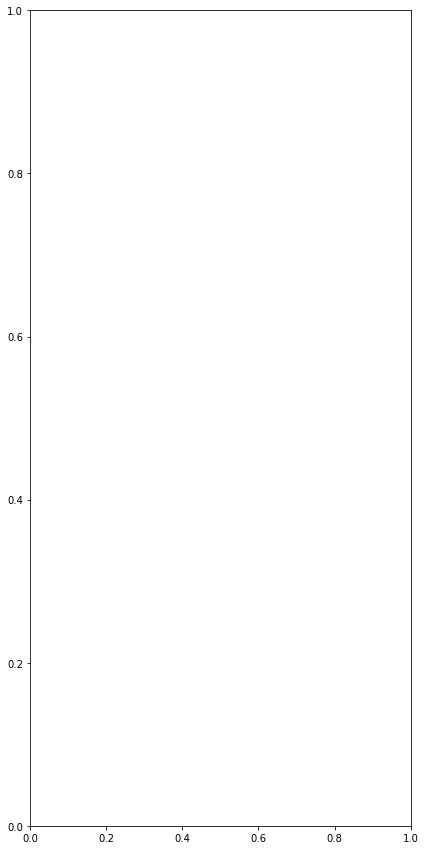

In [210]:
C5=nx.Graph()
C5.add_weighted_edges_from(data5) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Traffic Network")
#nx.draw(C5, with_labels=True, font_weight='bold')

# CLOSENESS AND STREACH CLOSENESS   CORELATIN ACCORDING SPEED

In [211]:
TRCC=nx.closeness_centrality(C5, distance="weight")

In [215]:
TRSCC95=Stretch_closeness_centrality(C5,Stretch=1.05,distance="weight")

In [216]:
TRSCC90=Stretch_closeness_centrality(C5,Stretch=1.1,distance="weight")

In [217]:
TRSCC85=Stretch_closeness_centrality(C5,Stretch=1.05,distance="weight")

In [212]:
TRSCC80=Stretch_closeness_centrality(C5,Stretch=1.2,distance="weight")


In [218]:
Tra=pd.DataFrame()

In [219]:
Tra["TRSCC0"],Tra["TRSCC1"],Tra["TRSCC950"],Tra["TRSCC951"],Tra["TRSCC900"],Tra["TRSCC901"],Tra["TRSCC850"],Tra["TRSCC851"],Tra["TRSCC800"],Tra["TRSCC801"]=list(TRCC.keys()),list(TRCC.values()),list(TRSCC95.keys()),list(TRSCC95.values()),list(TRSCC90.keys()),list(TRSCC90.values()),list(TRSCC85.keys()),list(TRSCC85.values()),list(TRSCC80.keys()),list(TRSCC80.values())

In [342]:
Tra

,TRSCC0,TRSCC1,TRSCC950,TRSCC951,TRSCC900,TRSCC901,TRSCC850,TRSCC851,TRSCC800,TRSCC801
0,322.00099,0.338598,322.00099,0.336837,322.00099,0.336836,322.00099,0.336837,322.00099,0.336826
1,321.98755,0.339396,321.98755,0.337626,321.98755,0.337625,321.98755,0.337626,321.98755,0.337616
2,321.56754,0.326897,321.56754,0.325256,321.56754,0.325253,321.56754,0.325256,321.56754,0.325230
3,321.47950,0.324062,321.47950,0.322450,321.47950,0.322446,321.47950,0.322450,321.47950,0.322424
4,321.47880,0.323287,321.47880,0.321235,321.47880,0.321217,321.47880,0.321235,321.47880,0.321210
...,...,...,...,...,...,...,...,...,...,...
13203,334.52029,0.693674,334.52029,0.687891,334.52029,0.687041,334.52029,0.687891,334.52029,0.687002
13204,330.65131,1.397599,330.65131,1.384445,330.65131,1.382334,330.65131,1.384445,330.65131,1.379005
13205,341.15690,0.274155,341.15690,0.273209,341.15690,0.273204,341.15690,0.273209,341.15690,0.273198
13206,334.86070,0.639874,334.86070,0.635628,334.86070,0.635242,334.86070,0.635628,334.86070,0.635215


In [343]:
Tra.to_excel("closenesperformans.xlsx") 

In [344]:
closenesperformans=pd.read_excel('closenesperformans.xlsx', index_col=0)

In [345]:
closenesperformans

,TRSCC0,TRSCC1,TRSCC950,TRSCC951,TRSCC900,TRSCC901,TRSCC850,TRSCC851,TRSCC800,TRSCC801
0,322.00099,0.338598,322.00099,0.336837,322.00099,0.336836,322.00099,0.336837,322.00099,0.336826
1,321.98755,0.339396,321.98755,0.337626,321.98755,0.337625,321.98755,0.337626,321.98755,0.337616
2,321.56754,0.326897,321.56754,0.325256,321.56754,0.325253,321.56754,0.325256,321.56754,0.325230
3,321.47950,0.324062,321.47950,0.322450,321.47950,0.322446,321.47950,0.322450,321.47950,0.322424
4,321.47880,0.323287,321.47880,0.321235,321.47880,0.321217,321.47880,0.321235,321.47880,0.321210
...,...,...,...,...,...,...,...,...,...,...
13203,334.52029,0.693674,334.52029,0.687891,334.52029,0.687041,334.52029,0.687891,334.52029,0.687002
13204,330.65131,1.397599,330.65131,1.384445,330.65131,1.382334,330.65131,1.384445,330.65131,1.379005
13205,341.15690,0.274155,341.15690,0.273209,341.15690,0.273204,341.15690,0.273209,341.15690,0.273198
13206,334.86070,0.639874,334.86070,0.635628,334.86070,0.635242,334.86070,0.635628,334.86070,0.635215


In [346]:
CP=closenesperformans.drop(["TRSCC950","TRSCC900","TRSCC850","TRSCC800"],axis=1)

In [347]:
CP["From_ID"]=CP["TRSCC0"]
CP["To_ID"]=CP["TRSCC0"]

In [348]:
CP=CP.drop(["TRSCC0"],axis=1)

In [349]:
CP

,TRSCC1,TRSCC951,TRSCC901,TRSCC851,TRSCC801,From_ID,To_ID
0,0.338598,0.336837,0.336836,0.336837,0.336826,322.00099,322.00099
1,0.339396,0.337626,0.337625,0.337626,0.337616,321.98755,321.98755
2,0.326897,0.325256,0.325253,0.325256,0.325230,321.56754,321.56754
3,0.324062,0.322450,0.322446,0.322450,0.322424,321.47950,321.47950
4,0.323287,0.321235,0.321217,0.321235,0.321210,321.47880,321.47880
...,...,...,...,...,...,...,...
13203,0.693674,0.687891,0.687041,0.687891,0.687002,334.52029,334.52029
13204,1.397599,1.384445,1.382334,1.384445,1.379005,330.65131,330.65131
13205,0.274155,0.273209,0.273204,0.273209,0.273198,341.15690,341.15690
13206,0.639874,0.635628,0.635242,0.635628,0.635215,334.86070,334.86070


In [350]:
CP.to_csv('Perfromance_of_traffic_Closeness.csv')

In [351]:
Tra_SClos=pd.read_csv('Perfromance_of_traffic_Closeness.csv')

In [352]:
Tra_SClos

,Unnamed: 0,TRSCC1,TRSCC951,TRSCC901,TRSCC851,TRSCC801,From_ID,To_ID
0,0,0.338598,0.336837,0.336836,0.336837,0.336826,322.00099,322.00099
1,1,0.339396,0.337626,0.337625,0.337626,0.337616,321.98755,321.98755
2,2,0.326897,0.325256,0.325253,0.325256,0.325230,321.56754,321.56754
3,3,0.324062,0.322450,0.322446,0.322450,0.322424,321.47950,321.47950
4,4,0.323287,0.321235,0.321217,0.321235,0.321210,321.47880,321.47880
...,...,...,...,...,...,...,...,...
13203,13203,0.693674,0.687891,0.687041,0.687891,0.687002,334.52029,334.52029
13204,13204,1.397599,1.384445,1.382334,1.384445,1.379005,330.65131,330.65131
13205,13205,0.274155,0.273209,0.273204,0.273209,0.273198,341.15690,341.15690
13206,13206,0.639874,0.635628,0.635242,0.635628,0.635215,334.86070,334.86070


In [353]:
inner_join5_1 = pd.merge(Traffic, 
                      Tra_SClos, 
                      on ='From_ID', 
                      how ='inner')
inner_join5_1

,Unnamed: 0_x,X1,Y1,X2,Y2,From_ID,To_ID_x,Edge_ID,Distance_km,Average_speed,Edge_Traffic,Unnamed: 0_y,TRSCC1,TRSCC951,TRSCC901,TRSCC851,TRSCC801,To_ID_y
0,0,28.080210,41.198894,28.078731,41.200240,322.00099,321.98755,643.98854,0.193369,44,"(322.00099, 321.98755)",0,0.338598,0.336837,0.336836,0.336837,0.336826,322.00099
1,22096,28.080210,41.198894,28.104809,41.072230,322.00099,322.12032,644.12131,14.207177,64,"(322.00099, 322.12032)",0,0.338598,0.336837,0.336836,0.336837,0.336826,322.00099
2,1,28.037025,41.197294,28.028172,41.197783,321.56754,321.47950,643.04704,0.736801,99,"(321.56754, 321.4795)",2,0.326897,0.325256,0.325253,0.325256,0.325230,321.56754
3,2,28.028122,41.197582,28.037035,41.197089,321.47880,321.56744,643.04624,0.741800,99,"(321.4788, 321.56744)",4,0.323287,0.321235,0.321217,0.321235,0.321210,321.47880
4,3,28.088747,41.191622,28.084574,41.196397,322.07909,322.04214,644.12123,0.633160,55,"(322.07909, 322.04214)",6,0.345040,0.343213,0.343209,0.343213,0.343186,322.07909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22360,22349,29.399515,40.865554,29.387603,40.876755,334.86070,334.75279,669.61349,1.588503,107,"(334.8607, 334.75279)",13206,0.639874,0.635628,0.635242,0.635628,0.635215,334.86070
22361,22352,28.943682,41.045271,28.939117,41.039778,330.48209,330.43095,660.91304,0.717860,35,"(330.48209, 330.43095)",12946,1.454622,1.436796,1.431721,1.436796,1.427164,330.48209
22362,22353,28.947593,41.049525,28.935306,41.036994,330.52546,330.39005,660.91551,1.724747,45,"(330.52546, 330.39005)",13207,1.329464,1.314602,1.315099,1.314602,1.313683,330.52546
22363,22355,28.943819,41.046556,28.939378,41.041136,330.48475,330.43492,660.91967,0.705560,54,"(330.48475, 330.43492)",12718,1.459581,1.440457,1.437709,1.440457,1.433486,330.48475


In [354]:
inner_join5_1["To_ID"]=inner_join5_1["To_ID_x"]

In [355]:
inner_join5_2=pd.merge(inner_join5_1,
                       Tra_SClos,
                       on ='To_ID', 
                       how ='inner')
inner_join5_2

,Unnamed: 0_x,X1,Y1,X2,Y2,From_ID_x,To_ID_x,Edge_ID,Distance_km,Average_speed,...,TRSCC801_x,To_ID_y,To_ID,Unnamed: 0,TRSCC1_y,TRSCC951_y,TRSCC901_y,TRSCC851_y,TRSCC801_y,From_ID_y
0,0,28.080210,41.198894,28.078731,41.200240,322.00099,321.98755,643.98854,0.193369,44,...,0.336826,322.00099,321.98755,1,0.339396,0.337626,0.337625,0.337626,0.337616,321.98755
1,5,28.078680,41.200190,28.078731,41.200240,321.98699,321.98755,643.97454,0.006980,44,...,0.337587,321.98699,321.98755,1,0.339396,0.337626,0.337625,0.337626,0.337616,321.98755
2,22096,28.080210,41.198894,28.104809,41.072230,322.00099,322.12032,644.12131,14.207177,64,...,0.336826,322.00099,322.12032,123,0.358640,0.357102,0.357101,0.357102,0.357098,322.12032
3,80,28.104385,41.071870,28.104809,41.072230,322.11572,322.12032,644.23604,0.053247,49,...,0.357343,322.11572,322.12032,123,0.358640,0.357102,0.357101,0.357102,0.357098,322.12032
4,1,28.037025,41.197294,28.028172,41.197783,321.56754,321.47950,643.04704,0.736801,99,...,0.325230,321.56754,321.47950,3,0.324062,0.322450,0.322446,0.322450,0.322424,321.47950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22360,22341,28.967659,41.025419,28.963137,41.021925,330.70201,330.65330,661.35531,0.539708,36,...,1.434856,330.70201,330.65330,12585,1.452229,1.438326,1.436785,1.438326,1.433172,330.65330
22361,22342,28.971655,41.018160,28.963137,41.021925,330.73471,330.65330,661.38801,0.821276,36,...,1.424694,330.73471,330.65330,12585,1.452229,1.438326,1.436785,1.438326,1.433172,330.65330
22362,22343,28.971906,41.018052,28.962970,41.021625,330.73711,330.65133,661.38844,0.841068,41,...,1.425365,330.73711,330.65133,12583,1.441899,1.428169,1.426630,1.428169,1.423305,330.65133
22363,22344,28.967772,41.025363,28.962969,41.021624,330.70308,330.65131,661.35439,0.575474,42,...,1.419959,330.70308,330.65131,13204,1.397599,1.384445,1.382334,1.384445,1.379005,330.65131


In [356]:
Closeness_Edge=pd.DataFrame()
Closeness_Edge["Average_speed"],Closeness_Edge["TRSCC"],Closeness_Edge["TRSCC95"],Closeness_Edge["TRSCC90"],Closeness_Edge["TRSCC85"],Closeness_Edge["TRSCC80"]=inner_join5_2["Average_speed"],inner_join5_2["TRSCC1_x"]+inner_join5_2["TRSCC1_y"],inner_join5_2["TRSCC951_x"]+inner_join5_2["TRSCC951_y"] ,inner_join5_2["TRSCC901_x"]+inner_join5_2["TRSCC901_y"],inner_join5_2["TRSCC851_x"]+inner_join5_2["TRSCC851_y"],inner_join5_2["TRSCC801_x"]+inner_join5_2["TRSCC801_y"]


In [357]:
Closeness_Edge

,Average_speed,TRSCC,TRSCC95,TRSCC90,TRSCC85,TRSCC80
0,44,0.677994,0.674464,0.674461,0.674464,0.674442
1,44,0.678763,0.675224,0.675220,0.675224,0.675202
2,64,0.697239,0.693940,0.693937,0.693940,0.693925
3,49,0.717527,0.714450,0.714447,0.714450,0.714442
4,99,0.650959,0.647706,0.647699,0.647706,0.647654
...,...,...,...,...,...,...
22360,36,2.906282,2.877882,2.875366,2.877882,2.868028
22361,36,2.895649,2.868080,2.865105,2.868080,2.857866
22362,41,2.885962,2.858431,2.855424,2.858431,2.848670
22363,42,2.837250,2.809930,2.806704,2.809930,2.798963


In [358]:
corr5 = Closeness_Edge.corr()

In [236]:
corr5 

,Average_speed,TRSCC,TRSCC95,TRSCC90,TRSCC85,TRSCC80
Average_speed,1.000000,-0.155264,-0.154994,-0.155441,-0.155520,-0.155432
TRSCC,-0.155264,1.000000,0.999949,0.999921,0.999901,0.999891
TRSCC95,-0.154994,0.999949,1.000000,0.999976,0.999962,0.999955
TRSCC90,-0.155441,0.999921,0.999976,1.000000,0.999988,0.999979
TRSCC85,-0.155520,0.999901,0.999962,0.999988,1.000000,0.999991
TRSCC80,-0.155432,0.999891,0.999955,0.999979,0.999991,1.000000


In [359]:
corr5 

,Average_speed,TRSCC,TRSCC95,TRSCC90,TRSCC85,TRSCC80
Average_speed,1.000000,-0.155264,-0.154994,-0.155441,-0.154994,-0.155432
TRSCC,-0.155264,1.000000,0.999949,0.999921,0.999949,0.999891
TRSCC95,-0.154994,0.999949,1.000000,0.999976,1.000000,0.999955
TRSCC90,-0.155441,0.999921,0.999976,1.000000,0.999976,0.999979
TRSCC85,-0.154994,0.999949,1.000000,0.999976,1.000000,0.999955
TRSCC80,-0.155432,0.999891,0.999955,0.999979,0.999955,1.000000


In [360]:
corr5[corr5.columns[-5:]][0:1]  # increase corelation rate  

,TRSCC,TRSCC95,TRSCC90,TRSCC85,TRSCC80
Average_speed,-0.155264,-0.154994,-0.155441,-0.154994,-0.155432


# BETWENLESS AND STREACH BETWEENLESS CORELATIN ACCORDING SPEED

In [238]:
TRBC=nx.edge_betweenness_centrality(C5,weight="weight")


In [312]:
TraE1=pd.DataFrame()
TraE1["TRSBC"],TraE1["TRSBC1"]=list(TRBC.keys()),list(TRBC.values())

In [ ]:
TraE1

In [311]:
TraE1["TRSBC950"],TraE1["TRSBC951"],TraE1["TRSBC900"],TraE1["TRSBC901"],TraE1["TRSBC850"],TraE1["TRSBC851"]=list(TRSBC95.keys()),list(TRSBC95.values()),list(TRSBC90.keys()),list(TRSBC90.values()),list(TRSBC85.keys()),list(TRSBC85.values())
TRSBC95=Stretch_Edge_Betweenless_Centrality(C5,1.05)


KeyboardInterrupt: 

In [243]:
TRSBC90=Stretch_Edge_Betweenless_Centrality(C5,1.1)


In [244]:
TRSBC85=Stretch_Edge_Betweenless_Centrality(C5,1.15)


In [245]:
TRSBC80=Stretch_Edge_Betweenless_Centrality(C5,1.20)

In [313]:
TraE1["TRSBC950"],TraE1["TRSBC951"],TraE1["TRSBC900"],TraE1["TRSBC901"],TraE1["TRSBC850"],TraE1["TRSBC851"],TraE1["TRSBC800"],TraE1["TRSBC801"]=list(TRSBC95.keys()),list(TRSBC95.values()),list(TRSBC90.keys()),list(TRSBC90.values()),list(TRSBC85.keys()),list(TRSBC85.values()),list(TRSBC80.keys()),list(TRSBC80.values())


In [314]:
TraE1.to_excel("BETWEEENperformans3.xlsx") 

In [332]:
Tra_SBet=pd.read_csv('BETWEEENperformans3.csv')

In [333]:
Tra_SBet

,Unnamed: 0,TRSBC1,TRSBC951,TRSBC901,TRSBC851,TRSBC801,Edge_Traffic
0,0,0.000176,7.144740e-04,1.594220e+23,4.487570e+21,4.924920e+21,"(322.00099, 321.98755)"
1,1,0.000007,2.455490e-04,1.897030e-04,2.107160e-04,2.375990e-04,"(322.00099, 321.98699)"
2,2,0.000034,2.109050e-06,3.289930e-05,7.410770e-05,7.486770e-05,"(322.00099, 322.12032)"
3,3,0.000150,1.010485e-03,1.594220e+23,4.487700e+21,4.924920e+21,"(321.98755, 321.98699)"
4,4,0.000769,5.017304e-03,8.941480e+23,2.516940e+22,2.762240e+22,"(321.98755, 321.98683)"
...,...,...,...,...,...,...,...
19837,19837,0.000112,3.114971e+02,3.159813e+01,3.236281e+03,5.953685e+01,"(329.18459, 329.19529)"
19838,19838,0.000178,2.642830e+16,9.592783e+10,4.558673e+08,6.707299e+07,"(327.9493, 327.94736)"
19839,19839,0.000966,1.536897e+03,3.780413e+06,9.862286e+06,9.298523e+06,"(332.97985, 332.98825)"
19840,19840,0.044518,2.910790e-04,7.451760e-04,1.072635e-03,8.791348e-02,"(332.52226, 332.37257)"


In [334]:
Traffic= pd.read_csv("Traffic.csv")

In [335]:
Traffic   

,Unnamed: 0,X1,Y1,X2,Y2,From_ID,To_ID,Edge_ID,Distance_km,Average_speed,Edge_Traffic
0,0,28.080210,41.198894,28.078731,41.200240,322.00099,321.98755,643.98854,0.193369,44,"(322.00099, 321.98755)"
1,1,28.037025,41.197294,28.028172,41.197783,321.56754,321.47950,643.04704,0.736801,99,"(321.56754, 321.4795)"
2,2,28.028122,41.197582,28.037035,41.197089,321.47880,321.56744,643.04624,0.741800,99,"(321.4788, 321.56744)"
3,3,28.088747,41.191622,28.084574,41.196397,322.07909,322.04214,644.12123,0.633160,55,"(322.07909, 322.04214)"
4,4,28.084418,41.196366,28.080557,41.195804,322.04055,322.00137,644.04192,0.326478,81,"(322.04055, 322.00137)"
...,...,...,...,...,...,...,...,...,...,...,...
22360,22360,29.273788,40.834981,29.291258,40.841103,333.57286,333.75368,667.32654,1.601345,59,"(333.57286, 333.75368)"
22361,22361,29.123072,41.052610,29.140351,41.081223,332.28333,332.48473,664.76806,3.484832,67,"(332.28333, 332.48473)"
22362,22362,28.608631,41.161816,28.702443,41.178884,327.24813,328.20331,655.45144,8.013568,46,"(327.24813, 328.20331)"
22363,22363,29.852690,41.127085,30.011030,41.046600,339.65399,341.15690,680.81089,15.891235,57,"(339.65399, 341.1569)"


In [336]:
#Traffic['Edge_Traffic']=Traffic["edge_traffic"]


inner_join6 = pd.merge(Traffic, 
                      Tra_SBet, 
                      on ='Edge_Traffic', 
                      how ='inner')
inner_join6

,Unnamed: 0_x,X1,Y1,X2,Y2,From_ID,To_ID,Edge_ID,Distance_km,Average_speed,Edge_Traffic,Unnamed: 0_y,TRSBC1,TRSBC951,TRSBC901,TRSBC851,TRSBC801
0,0,28.080210,41.198894,28.078731,41.200240,322.00099,321.98755,643.98854,0.193369,44,"(322.00099, 321.98755)",0,0.000176,7.144740e-04,1.594220e+23,4.487570e+21,4.924920e+21
1,1,28.037025,41.197294,28.028172,41.197783,321.56754,321.47950,643.04704,0.736801,99,"(321.56754, 321.4795)",6,0.000151,2.620890e-04,2.642500e-04,2.642730e-04,2.644220e-04
2,2,28.028122,41.197582,28.037035,41.197089,321.47880,321.56744,643.04624,0.741800,99,"(321.4788, 321.56744)",8,0.000151,2.620380e-04,2.642170e-04,2.642710e-04,2.644880e-04
3,3,28.088747,41.191622,28.084574,41.196397,322.07909,322.04214,644.12123,0.633160,55,"(322.07909, 322.04214)",10,0.004044,4.763758e+08,2.239624e+08,1.188930e+17,2.121420e+13
4,4,28.084418,41.196366,28.080557,41.195804,322.04055,322.00137,644.04192,0.326478,81,"(322.04055, 322.00137)",15,0.000004,1.034215e-03,9.650000e-04,9.422650e-04,9.448800e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,22346,28.599598,40.968913,28.595808,40.973258,326.96489,326.93134,653.89623,0.575815,54,"(326.96489, 326.93134)",1290,0.000431,6.949470e-04,9.204451e-01,1.912730e+01,2.145831e+01
13363,22351,29.098204,41.125619,29.095441,41.115923,332.10766,332.07033,664.17799,1.100418,56,"(332.10766, 332.07033)",10165,0.002137,2.352120e-04,3.562520e-04,4.641240e-04,5.471710e-04
13364,22359,29.057076,41.166764,29.048744,41.163190,331.73752,331.65063,663.38815,0.797265,47,"(331.73752, 331.65063)",9322,0.000155,1.134170e-04,6.236800e+01,2.968099e+03,2.981646e+03
13365,22361,29.123072,41.052610,29.140351,41.081223,332.28333,332.48473,664.76806,3.484832,67,"(332.28333, 332.48473)",15276,0.000196,6.396975e+03,1.035559e+02,3.414208e+02,2.020650e+13


In [337]:
Data6=pd.DataFrame()
Data6["Average_Speed"],Data6["TRBC"],Data6["TRSBC95"],Data6["TRSBC90"],Data6["TRSBC85"],Data6["TRSBC80"]=inner_join6["Average_speed"],inner_join6["TRSBC1"],inner_join6["TRSBC951"],inner_join6["TRSBC901"],inner_join6["TRSBC851"],inner_join6["TRSBC801"]


In [338]:
Data6

,Average_Speed,TRBC,TRSBC95,TRSBC90,TRSBC85,TRSBC80
0,44,0.000176,7.144740e-04,1.594220e+23,4.487570e+21,4.924920e+21
1,99,0.000151,2.620890e-04,2.642500e-04,2.642730e-04,2.644220e-04
2,99,0.000151,2.620380e-04,2.642170e-04,2.642710e-04,2.644880e-04
3,55,0.004044,4.763758e+08,2.239624e+08,1.188930e+17,2.121420e+13
4,81,0.000004,1.034215e-03,9.650000e-04,9.422650e-04,9.448800e-04
...,...,...,...,...,...,...
13362,54,0.000431,6.949470e-04,9.204451e-01,1.912730e+01,2.145831e+01
13363,56,0.002137,2.352120e-04,3.562520e-04,4.641240e-04,5.471710e-04
13364,47,0.000155,1.134170e-04,6.236800e+01,2.968099e+03,2.981646e+03
13365,67,0.000196,6.396975e+03,1.035559e+02,3.414208e+02,2.020650e+13


In [339]:
corr6 = Data6.corr()

In [340]:
corr6

,Average_Speed,TRBC,TRSBC95,TRSBC90,TRSBC85,TRSBC80
Average_Speed,1.000000,0.024047,0.026422,0.026422,0.026427,0.028039
TRBC,0.024047,1.000000,-0.000953,-0.000953,-0.000954,0.004164
TRSBC95,0.026422,-0.000953,1.000000,1.000000,1.000000,0.977807
TRSBC90,0.026422,-0.000953,1.000000,1.000000,1.000000,0.977807
TRSBC85,0.026427,-0.000954,1.000000,1.000000,1.000000,0.977807
TRSBC80,0.028039,0.004164,0.977807,0.977807,0.977807,1.000000


In [341]:
corr6[corr6.columns[-5:]][0:1]  # increase corelation rate  

,TRBC,TRSBC95,TRSBC90,TRSBC85,TRSBC80
Average_Speed,0.024047,0.026422,0.026422,0.026427,0.028039


#  FOOD_DELİVERY 

In [361]:
Food=pd.read_csv('Food_Delivery.csv')

In [362]:
Food

,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0
...,...,...,...,...,...,...
42219,50006,1449431614,1449431244,16.0,2,20.0
42220,50007,1449431614,1449431574,17.0,2,20.0
42221,50008,1449431622,60095777,196.0,1,15.0
42222,50009,1449431623,1449431622,19.0,1,15.0


In [363]:
Food_weight=Food["distance(m)"]

Food_weight_norm =Food_weight/Food_weight.max()

In [364]:
data7=[]
edge7=[]
for i in range(len(Food)):
    data7.append((Food["u"][i],Food["v"][i],Food_weight_norm[i]))
    edge7.append((Food["u"][i],Food["v"][i]))

In [365]:
Food["Edges"]=edge7

Delivery Network


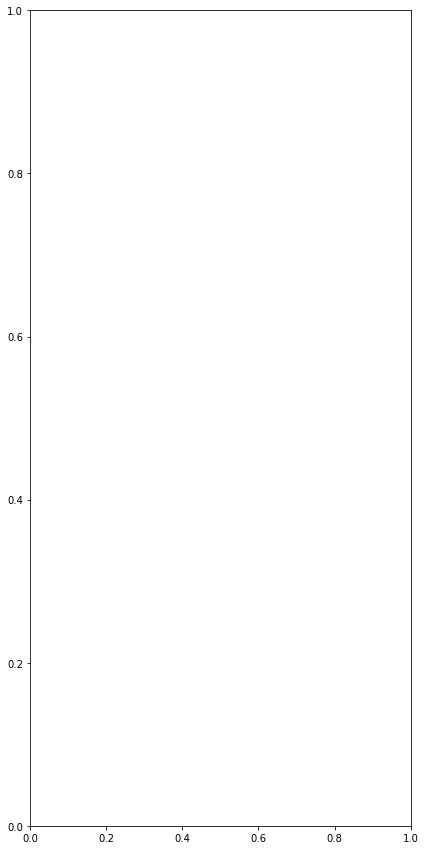

In [366]:
C6=nx.Graph()
C6.add_weighted_edges_from(data7) #
plt.subplots(figsize=(15,15))
plt.subplot(121)
print("Delivery Network")
#nx.draw(C6, with_labels=True, font_weight='bold')

# Closeness_centrality AND STREACH closeness_centrality CORELATIN ACCORDING time

In [369]:
FCC=nx.closeness_centrality(C6, distance="weight")
FSCC95=Stretch_closeness_centrality(C6,Stretch=1.05,distance="weight")
FSCC90=Stretch_closeness_centrality(C6,Stretch=1.1,distance="weight")
FSCC85=Stretch_closeness_centrality(C6,Stretch=1.15,distance="weight")
FSCC80=Stretch_closeness_centrality(C6,Stretch=1.2,distance="weight")


In [ ]:
#FSCC85=Stretch_closeness_centrality(C6,Stretch=0.85,distance="weight")
#FSCC80=Stretch_closeness_centrality(C6,Stretch=0.8,distance="weight")

In [372]:
FP=pd.DataFrame()
FP["FCC_Node"],FP["FCC"]=list(FCC.keys()),list(FCC.values())

In [373]:
FP["FSCC95_Node"],FP["FSCC95"],FP["FSCC90_Node"],FP["FSCC90"]=list(FSCC95.keys()),list(FSCC95.values()),list(FSCC90.keys()),list(FSCC90.values())

In [374]:
FP["FSCC85_Node"],FP["FSCC85"],FP["FSCC80_Node"],FP["FSCC80"]=list(FSCC85.keys()),list(FSCC85.values()),list(FSCC80.keys()),list(FSCC80.values())

In [130]:
FP.to_csv('Perfromance_of_Delivery_betweenlessal.csv')


In [64]:
FP=pd.read_csv('Perfromance_of_Delivery_betweenlessall.csv')

In [375]:
FP

,FCC_Node,FCC,FSCC95_Node,FSCC95,FSCC90_Node,FSCC90,FSCC85_Node,FSCC85,FSCC80_Node,FSCC80
0,711327755,16.285356,711327755,16.068990,711327755,15.992588,711327755,15.967916,711327755,15.966602
1,711332946,15.923137,711332946,15.686789,711332946,15.643015,711332946,15.619461,711332946,15.618236
2,55725841,16.381710,55725841,16.162821,55725841,16.085516,55725841,16.060585,55725841,16.059227
3,711327760,16.890431,711327760,16.658485,711327760,16.596387,711327760,16.549246,711327760,16.547552
4,711327756,15.874380,711327756,15.638985,711327756,15.595883,711327756,15.572471,711327756,15.571253
...,...,...,...,...,...,...,...,...,...,...
17112,207093495,8.000485,207093495,7.899923,207093495,7.897978,207093495,7.897524,207093495,7.897524
17113,207093524,8.432734,207093524,8.317546,207093524,8.317331,207093524,8.309640,207093524,8.308167
17114,207093572,8.675552,207093572,8.590215,207093572,8.576462,207093572,8.574285,207093572,8.573621
17115,207093574,8.569089,207093574,8.485818,207093574,8.472367,207093574,8.470069,207093574,8.469505


In [371]:
FP

NameError: name 'FP' is not defined

In [17]:
#FSCC80=Stretch_closeness_centrality(C6,Stretch=0.8,distance="weight")

In [133]:
#=pd.DataFrame()
#FP["FSCC80_Node"],FP["FSCC80"]=list(FSCC80.keys()),list(FSCC80.values())

In [376]:
FP.to_csv('Perfromance_of_Delivery_betweenlessall.csv')

In [378]:
FP.to_excel("FP.xlsx") 

In [115]:
fdm=pd.read_csv('Perfromance_of_traffic_betweenless.csv')

In [116]:
fdm1=pd.read_csv('Perfromance_of_Delivery_betweenless80.csv')

In [368]:
FP

NameError: name 'FP' is not defined

In [ ]:
corr_delivery=pd.DataFrame()

In [ ]:
corr_delivery["FCC"],corr_delivery["FSBC95"],corr_delivery["FSBC90"],corr_delivery["FSBC85"],corr_delivery["FSBC80"]=[0.004705884],[0.006389042],[0.003147387],[-0.000995495],[-0.001770207] 


In [ ]:
corr_delivery

# edge_betweenness_centrality AND STREACH edge_betweenness_centrality CORELATIN ACCORDING time

In [379]:
FBC=nx.edge_betweenness_centrality(C6,weight="weight")

In [380]:
FSBC95=Stretch_closeness_centrality(C6,Stretch=1.05,distance="weight")
FSBC90=Stretch_closeness_centrality(C6,Stretch=1.1,distance="weight")
FSBC85=Stretch_closeness_centrality(C6,Stretch=1.15,distance="weight")
FSBC80=Stretch_closeness_centrality(C6,Stretch=1.2,distance="weight")

{(711327755, 711332946): 0.0016305544769257313,
 (711327755, 55725841): 0.0017465013994456828,
 (711327755, 711327760): 9.045153584182043e-08,
 (711332946, 711327756): 0.0015146135682545237,
 (711332946, 711331419): 5.453097982916579e-07,
 (55725841, 317729584): 0.001862496107682683,
 (55725841, 603633283): 2.9012756779451836e-08,
 (711327760, 603633283): 0.005587937167461755,
 (711327760, 711331451): 0.005471877607180189,
 (711327756, 703557073): 0.0013992880388463006,
 (711327756, 711331420): 9.046941485160048e-07,
 (703557073, 711331402): 8.164043474930456e-07,
 (703557073, 703557070): 0.0012832615384791824,
 (711331420, 711331416): 9.807195989762692e-05,
 (711331420, 711331419): 1.928937108608397e-05,
 (711327759, 711331451): 0.004066278147852867,
 (711327759, 703557072): 0.003843694155136439,
 (711327759, 711331434): 0.00010828658763823324,
 (711331451, 711331435): 0.001289990563868737,
 (703557072, 711331374): 0.00023450618779298016,
 (703557072, 703557071): 0.003496102043968512,

In [ ]:
FBC_1["TRSBC950"],FBC_1["TRSBC951"],FBC_1["TRSBC900"],FBC_1["TRSBC901"],FBC_1["TRSBC850"],FBC_1["TRSBC851"],FBC_1["TRSBC800"],FBC_1["TRSBC801"]=list(FSBC95.keys()),list(FSBC95.values()),list(FSBC90.keys()),list(FSBC90.values()),list(FSBC85.keys()),list(FSBC85.values(),list(FSBC80.keys()),list(FSBC80.values())


In [391]:
FSBC95=Stretch_Edge_Betweenless_Centrality(C6,1.05)

In [392]:
FSBC90=Stretch_Edge_Betweenless_Centrality(C6,1.10)

In [393]:
FSBC85=Stretch_Edge_Betweenless_Centrality(C6,1.15)

In [394]:
FSBC80=Stretch_Edge_Betweenless_Centrality(C6,1.20)

In [395]:
FBC_1=pd.DataFrame()
FBC_1["FBC_Node"],FBC_1["FBC"]=list(FBC.keys()),list(FBC.values())

In [397]:
FBC_1["TRSBC950"],FBC_1["TRSBC951"],FBC_1["TRSBC900"],FBC_1["TRSBC901"],FBC_1["TRSBC850"],FBC_1["TRSBC851"],FBC_1["TRSBC800"],FBC_1["TRSBC801"]=list(FSBC95.keys()),list(FSBC95.values()),list(FSBC90.keys()),list(FSBC90.values()),list(FSBC85.keys()),list(FSBC85.values()),list(FSBC80.keys()),list(FSBC80.values())


In [387]:
FBC_1["TRSBC951"]=list(FSBC95.values())

ValueError: Length of values (17117) does not match length of index (25491)

In [388]:
FBC_1["TRSBC950"],FBC_1["TRSBC951"],FBC_1["TRSBC900"],FBC_1["TRSBC901"],FBC_1["TRSBC850"],FBC_1["TRSBC851"],FBC_1["TRSBC800"],FBC_1["TRSBC801"]=list(FSBC95.keys()),list(FSBC95.values()),list(FSBC90.keys()),list(FSBC90.values()),list(FSBC85.keys()),list(FSBC85.values(),list(FSBC80.keys()),list(FSBC80.values())


SyntaxError: unexpected EOF while parsing (4107864405.py, line 1)

In [407]:
FBC_1["Edges"]=FBC_1["TRSBC950"]

In [399]:
FBC_1.to_csv('FSBC.csv')

In [400]:
FBC_1.to_excel("FBC_1..xlsx") 

In [34]:
FSBC=pd.read_csv('FBC_1.csv')

In [402]:
Food

,Unnamed: 0,u,v,distance(m),street type,speed(km/h),Edges
0,0,711327755,711332946,58.0,1,15.0,"(711327755, 711332946)"
1,2,711327755,55725841,15.0,2,20.0,"(711327755, 55725841)"
2,3,711327755,711327760,165.0,1,15.0,"(711327755, 711327760)"
3,4,711327756,703557073,4.0,0,10.0,"(711327756, 703557073)"
4,5,711327756,711332946,8.0,1,15.0,"(711327756, 711332946)"
...,...,...,...,...,...,...,...
42219,50006,1449431614,1449431244,16.0,2,20.0,"(1449431614, 1449431244)"
42220,50007,1449431614,1449431574,17.0,2,20.0,"(1449431614, 1449431574)"
42221,50008,1449431622,60095777,196.0,1,15.0,"(1449431622, 60095777)"
42222,50009,1449431623,1449431622,19.0,1,15.0,"(1449431623, 1449431622)"


In [404]:
FSBC

NameError: name 'FSBC' is not defined

In [50]:
Food

,Unnamed: 0,u,v,distance(m),street type,speed(km/h),Edges
0,0,711327755,711332946,58.0,1,15.0,"(711327755, 711332946)"
1,2,711327755,55725841,15.0,2,20.0,"(711327755, 55725841)"
2,3,711327755,711327760,165.0,1,15.0,"(711327755, 711327760)"
3,4,711327756,703557073,4.0,0,10.0,"(711327756, 703557073)"
4,5,711327756,711332946,8.0,1,15.0,"(711327756, 711332946)"
...,...,...,...,...,...,...,...
42219,50006,1449431614,1449431244,16.0,2,20.0,"(1449431614, 1449431244)"
42220,50007,1449431614,1449431574,17.0,2,20.0,"(1449431614, 1449431574)"
42221,50008,1449431622,60095777,196.0,1,15.0,"(1449431622, 60095777)"
42222,50009,1449431623,1449431622,19.0,1,15.0,"(1449431623, 1449431622)"


In [408]:
f=pd.merge(FBC_1,Food,on ='Edges',how ='inner')
f

,FBC_Node,FBC,TRSBC950,TRSBC951,TRSBC900,TRSBC901,TRSBC850,TRSBC851,TRSBC800,TRSBC801,Edges,Unnamed: 0,u,v,distance(m),street type,speed(km/h)
0,"(711327755, 711332946)",1.630554e-03,"(711327755, 711332946)",0.000448,"(711327755, 711332946)",6.549314e-04,"(711327755, 711332946)",6.950354e-04,"(711327755, 711332946)",7.088887e-04,"(711327755, 711332946)",0,711327755,711332946,58.0,1,15.0
1,"(711327755, 55725841)",1.746501e-03,"(711327755, 55725841)",0.000592,"(711327755, 55725841)",5.758226e-04,"(711327755, 55725841)",5.660771e-04,"(711327755, 55725841)",5.624645e-04,"(711327755, 55725841)",2,711327755,55725841,15.0,2,20.0
2,"(711327755, 711327760)",9.045154e-08,"(711327755, 711327760)",0.000097,"(711327755, 711327760)",4.828720e-03,"(711327755, 711327760)",8.919384e-03,"(711327755, 711327760)",1.244345e-02,"(711327755, 711327760)",3,711327755,711327760,165.0,1,15.0
3,"(711332946, 711327756)",1.514614e-03,"(711332946, 711327756)",0.001108,"(711332946, 711327756)",9.794287e-04,"(711332946, 711327756)",9.643264e-04,"(711332946, 711327756)",9.616522e-04,"(711332946, 711327756)",2047,711332946,711327756,8.0,0,10.0
4,"(711332946, 711331419)",5.453098e-07,"(711332946, 711331419)",0.000886,"(711332946, 711331419)",1.112148e-03,"(711332946, 711331419)",1.137854e-03,"(711332946, 711331419)",1.141081e-03,"(711332946, 711331419)",2051,711332946,711331419,44.0,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21926,"(775945931, 775945934)",1.667497e-02,"(775945931, 775945934)",0.012743,"(775945931, 775945934)",4.938962e-04,"(775945931, 775945934)",4.405956e-04,"(775945931, 775945934)",4.044573e-04,"(775945931, 775945934)",49865,775945931,775945934,24.0,1,15.0
21927,"(207093490, 207093493)",1.480333e-04,"(207093490, 207093493)",2.303727,"(207093490, 207093493)",6.811311e-01,"(207093490, 207093493)",2.536668e-01,"(207093490, 207093493)",1.685911e-01,"(207093490, 207093493)",49896,207093490,207093493,77.0,2,20.0
21928,"(207093493, 207093495)",3.127234e-05,"(207093493, 207093495)",0.000149,"(207093493, 207093495)",4.849190e-03,"(207093493, 207093495)",1.611411e+02,"(207093493, 207093495)",2.780793e+01,"(207093493, 207093495)",49900,207093493,207093495,103.0,0,10.0
21929,"(207093572, 207093574)",2.335902e-04,"(207093572, 207093574)",0.000446,"(207093572, 207093574)",3.343449e-04,"(207093572, 207093574)",3.190713e-04,"(207093572, 207093574)",3.392185e-04,"(207093572, 207093574)",49974,207093572,207093574,60.0,2,20.0


In [409]:
FB_Edge=pd.DataFrame()
FB_Edge["Average_speed"],FB_Edge["TRSCC"],FB_Edge["TRSCC95"],FB_Edge["TRSCC90"],FB_Edge["TRSCC85"],FB_Edge["TRSCC80"]=f["speed(km/h)"],f["FBC"],f["TRSBC951"],f["TRSBC901"],f["TRSBC851"],f["TRSBC801"]


In [410]:
corr8 = FB_Edge.corr()



In [411]:
corr8

,Average_speed,TRSCC,TRSCC95,TRSCC90,TRSCC85,TRSCC80
Average_speed,1.000000,0.006176,0.005669,0.008886,-0.005210,-0.009314
TRSCC,0.006176,1.000000,-0.001954,-0.005962,0.005842,0.012827
TRSCC95,0.005669,-0.001954,1.000000,0.172372,0.019450,0.033576
TRSCC90,0.008886,-0.005962,0.172372,1.000000,0.008849,0.010366
TRSCC85,-0.005210,0.005842,0.019450,0.008849,1.000000,0.552702
TRSCC80,-0.009314,0.012827,0.033576,0.010366,0.552702,1.000000


In [56]:
cor_delivery=pd.DataFrame()

In [59]:
cor_delivery["FBC"],cor_delivery["FSBC95"],cor_delivery["FSBC90"],cor_delivery["FSBC85"],cor_delivery["FSBC80"]

In [60]:
cor_delivery


,FBC,FSBC95,FSBC90,FSBC85,FSBC80
0,-0.001476,0.000938,0.001926,0.001827,-0.001918


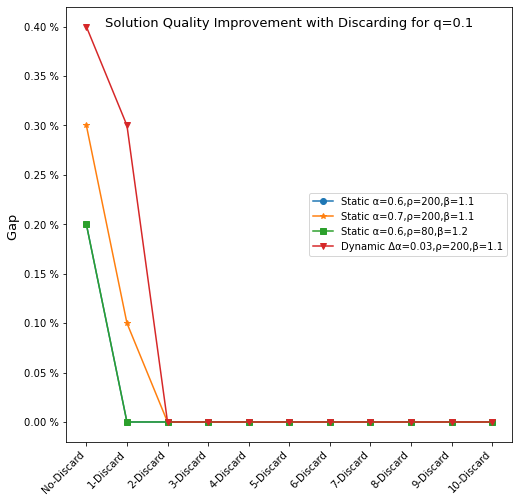

In [414]:
# importing package
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker 
import numpy as np
  
# create data
y1 = [0.2 , 0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0,0.0 ]
y2 = [0.3 , 0.1 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0,0.0 ]
y3 = [0.2 , 0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0,0.0] 
y4 = [0.4 , 0.3 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0, 0.0]

x = ["No-Discard","1-Discard","2-Discard","3-Discard","4-Discard","5-Discard","6-Discard","7-Discard","8-Discard","9-Discard","10-Discard"]

 
# plot lines
plt.subplots(figsize=(8,8))

plt.plot(x, y1, marker='o',label = "Static α=0.6,ρ=200,β=1.1", )
plt.plot(x, y2, marker='*',label = "Static α=0.7,ρ=200,β=1.1")
plt.plot(x, y3, marker='s',label = "Static α=0.6,ρ=80,β=1.2")
plt.plot(x, y4, marker='v',label = "Dynamic Δα=0.03,ρ=200,β=1.1")


plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f %%' ))
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f Discard'))

plt.text(0.45, 0.40, 'Solution Quality Improvement with Discarding for q=0.1', fontsize = 13)

#plt.xlabel("Discard Value",fontsize = 13)
plt.ylabel("Gap ", fontsize = 13)

plt.xticks(rotation=45, ha='right')
plt.legend(loc = 'center right' )
plt.savefig('figure11.png')
plt.show()


In [70]:
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker 
import numpy as np

In [ ]:
y1=[0.216376,0.21943,0.21943,0.21943,0.237935]
y2=[-0.302052,-0.30253,-0.30253,-0.30253,-0.287899]
y3=[0.260992,0.26217,0.270447,0.269594,0.268657]
y4=[-0.454287,-0.455349,-0.456978,-0.458095,-0.45819]
y5=[0.463364,0.462558,0.445009,0.444038,0.458706]
y6=[-0.372518,-0.372579,0.368376,-0.353513,-0.350575]
y7=[0.175526,0.176083,0.178584,0.169502,0.161394]
y8=[-0.047181,-0.046207,-0.03856,-0.055888,-0.058902]
y9=[-0.155264,-0.154994,0.155441,-0.154994,-0.155432]
y10=[0.004077451,0.003997364,0.004023283,0.003986867,0.003947217]


In [433]:
y1=[0.216,0.219,0.219,0.219,0.238]
y2=[-0.302,-0.303,-0.303,-0.303,-0.288]
y3=[0.261,0.262,0.27,0.27,0.269]
y4=[-0.454,-0.455,-0.457,-0.458,-0.458]
y5=[0.463,0.463,0.445,0.444,0.459]
y6=[-0.373,-0.373,-0.368,-0.354,-0.351]
y7=[0.176,0.176,0.179,0.17,0.161]
y8=[-0.047,-0.046,-0.039,-0.056,-0.059]
y9=[-0.155,-0.155,-0.155,-0.156,-0.155]
y10=[0.005,0.006,0.003,-0.001,-0.002]

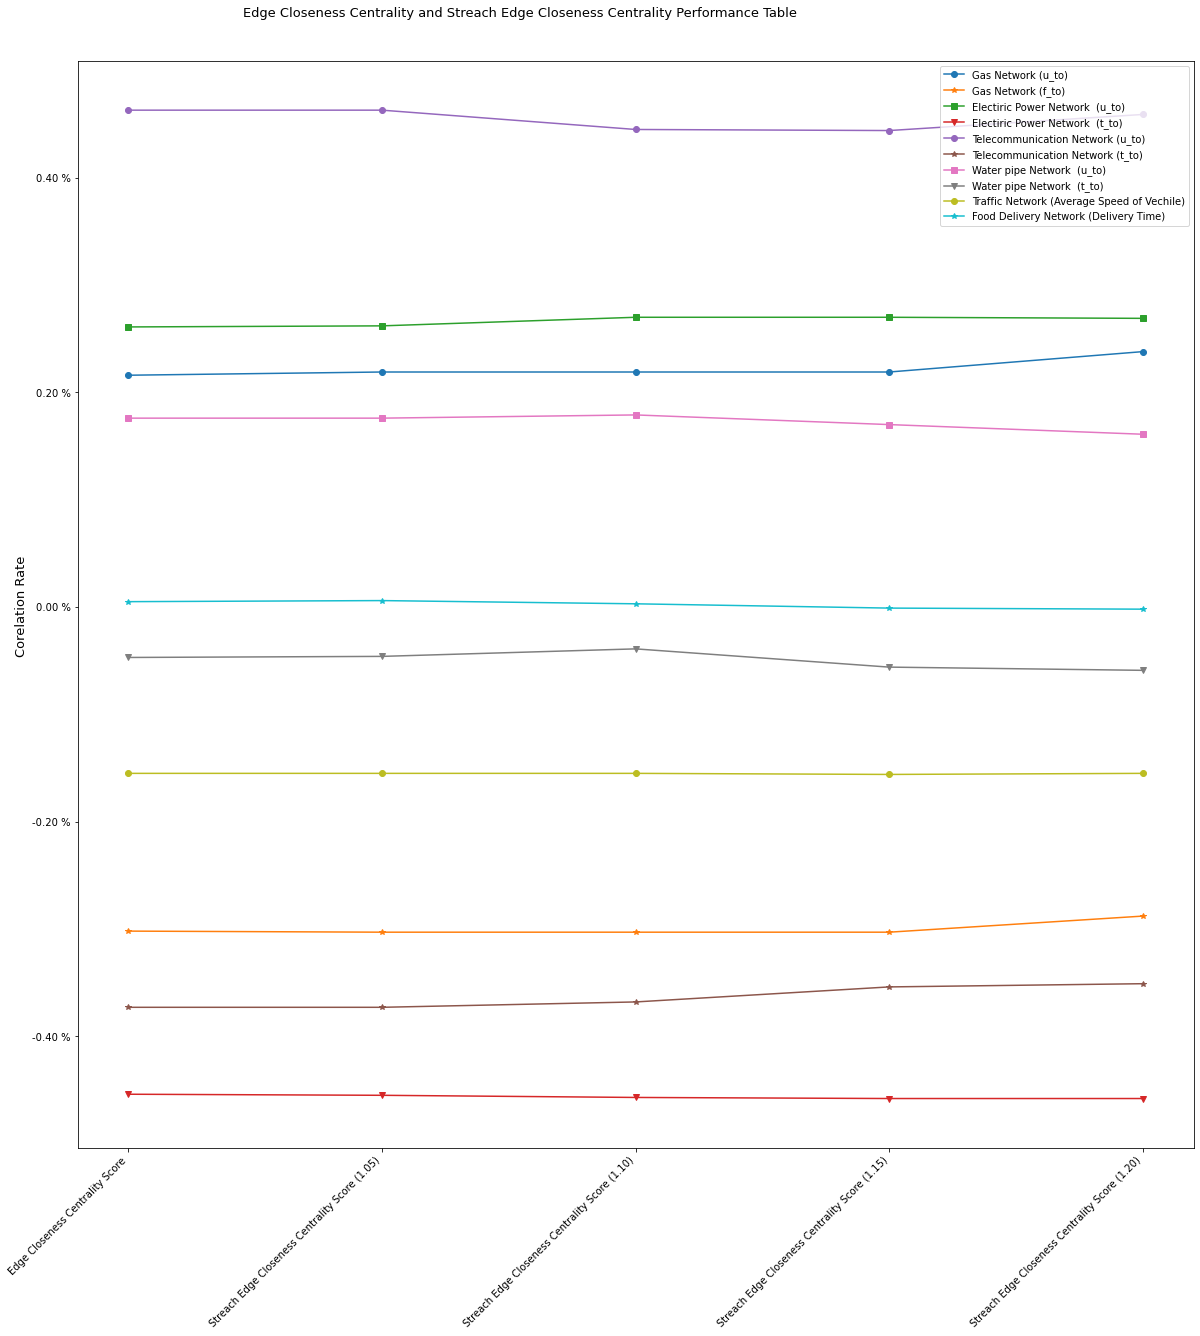

In [434]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

# = ["No-Discard","1-Discard","2-Discard","3-Discard","4-Discard","5-Discard","6-Discard","7-Discard","8-Discard","9-Discard","10-Discard"]
x=["Edge Closeness Centrality Score","Streach Edge Closeness Centrality Score (1.05)","Streach Edge Closeness Centrality Score (1.10)","Streach Edge Closeness Centrality Score (1.15)","Streach Edge Closeness Centrality Score (1.20)"]
y=["u_to","f_t0","u_to","f_t0""u_to","f_t0""u_to","f_t0""u_to","f_t0","speed_of_vechile","Delivery_Time"]

# plot lines
plt.subplots(figsize=(20,20))


#host = host_subplot(111, axes_class=AA.Axes)

plt.plot(x, y1, marker='o',label = "Gas Network (u_to)" )
plt.plot(x, y2, marker='*',label = "Gas Network (f_to)")
plt.plot(x, y3, marker='s',label = "Electiric Power Network  (u_to)")
plt.plot(x, y4, marker='v',label = "Electiric Power Network  (t_to)")
plt.plot(x, y5, marker='o',label = "Telecommunication Network (u_to)" )
plt.plot(x, y6, marker='*',label = "Telecommunication Network (t_to)")
plt.plot(x, y7, marker='s',label = "Water pipe Network  (u_to)")
plt.plot(x, y8, marker='v',label = "Water pipe Network  (t_to)")
plt.plot(x, y9, marker='o',label = "Traffic Network (Average Speed of Vechile)" )
plt.plot(x, y10, marker='*',label = "Food Delivery Network (Delivery Time)")


par1 = host.twiny()
offset = 30
new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
par1.axis["right"] = new_fixed_axis1(loc="right",axes=par1,offset=(30, 0))

#par1.set_yscale(y)







plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f %%' ))
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f Discard'))


#





plt.text(0.45, 0.55, 'Edge Closeness Centrality and Streach Edge Closeness Centrality Performance Table', fontsize = 13)

#plt.xlabel("Discard Value",fontsize = 13)
plt.ylabel("Corelation Rate ", fontsize = 13)

plt.xticks(rotation=45, ha='right')



plt.xticks(rotation=45, ha='right')
plt.legend(loc = 'best' )
plt.savefig('figure1.png')
plt.show()


In [123]:
dir(par1)

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_axisline_on',
 '_axislines',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_pat

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
plt.figure(figsize=[12,12])


x1=["α=0.6, ρ=200, β=1.1","α=0.7, ρ=200, β=1.1","α=0.6, ρ=80, β=1.2","Δα=0.03, ρ=200, β=1.1"]
y1=[0,0,0,0]

x2=["α=0.6, ρ=200, β=1.1","α=0.7, ρ=200, β=1.1","α=0.6, ρ=80, β=1.2","Δα=0.03, ρ=200, β=1.1"]
y2=[113.96,160.11,165.33,165.4]

x3=["N=10","N=25","N=40","N=50","N=75"]
y3=[0.152545267,0.027909153,0.017035205,0.013739821,0.008995145]

x4=["N=10","N=25","N=40","N=50","N=75"]
y4=[46.7487,125.6164,221.3953,339.3277,670.2869]


host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()


par1y = host.twiny()
par2y = host.twiny()
par3y = host.twiny()



offset = 30
new_fixed_axis1 = par1.get_grid_helper().new_fixed_axis
new_fixed_axis2 = par2.get_grid_helper().new_fixed_axis
new_fixed_axis3 = par3.get_grid_helper().new_fixed_axis









par1.axis["right"] = new_fixed_axis1(loc="right",
                                    axes=par1,
                                    offset=(30, 0))

par1.axis["right"].toggle(all=True)


par2.axis["right"] = new_fixed_axis2(loc="right",
                                    axes=par2,
                                    offset=(60, 0))

par2.axis["right"].toggle(all=True)




par3.axis["right"] = new_fixed_axis3(loc="right",
                                    axes=par3,
                                    offset=(90, 0))

par3.axis["right"].toggle(all=True)


host.axis["top"] = host.get_grid_helper().new_fixed_axis(loc="top", axes=host, offset=(0, 10) )
host.axis["top"].toggle(all=True)


par3y.axis["bottom"] = par3y.get_grid_helper().new_fixed_axis(loc="bottom", axes=par3y, offset=(0, -30) )
par3y.axis["bottom"].toggle()


host.set_xlim(0,3)
host.set_ylim(0,1)
host.axis["left"].label.set_color(p1.get_color())





#par1.set_xlim(4,8)
par1.set_ylim(0, 170)

#par2.set_xlim(4,8)
par2.set_ylim(0, 0.2)



par2.set_xlim(0,8)


par3.set_ylim(0, 700)


host.set_xlabel("Distance")
par3.set_xlabel("n liolan;")
par3y.set_ylabel("w")

host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")
par3.set_ylabel("kenan")




p1, = host.plot(x1, y1, label="Density")
p2, = par1.plot(x2, y2, label="Temperature")
p3, = par2.plot(x3, y3, label="Velocity")
p4, = par3.plot(x4, y4, label="kenan")

#p5, = par3y.plot(x4, y4, label="w")

#p1, = host.plot(x1, y1, label="Density")
#p2, = par1.plot(x2, y2, label="Temperature")
#p3, = par2.plot(x3, y3, label="Velocity")







host.legend()
#par3.legend()



par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())
par3.axis["right"].label.set_color(p4.get_color())
par3y.axis["right"].label.set_color(p4.get_color())

plt.draw()
plt.show()

In [ ]:
Gas Network (u_to)
Gas Network (f_to)
Electiric Power Network  (u_to)
Electiric Power Network  (t_to)
Telecommunication Network (u_to)
Telecommunication Network (t_to)
Water pipe Network  (u_to)
Water pipe Network  (t_to)
Traffic Network (Average Speed of Vechile)
Food Delivery Network (Delivery Time)


In [ ]:

===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

In [429]:
y1=[0.564321,0.615842,0.582725,0.693624,0.676915]
y2=[-0.064026,-0.078476,-0.155317,-0.281549,-0.358092]
y3=[0.260992,0.26217,0.270447,0.269594,0.268657]
y4=[-0.454287,-0.455349,-0.456978,-0.458095,-0.45819]
y5=[0.067019,0.110498,0.26831,0.27044,0.379335]
y6=[-0.245983,-0.313856,-0.392034,-0.467183,-0.530384]
y7=[0.145402,0.153327,0.042793,0.017482,0.154716]
y8=[-0.18887,-0.281869,-0.520322,-0.703435,-0.769229]
y9=[0.024047,0.026422,0.026422,0.026427,0.028039]
y10=[0.006176,0.005669,0.008886,-0.005210,-0.009314]

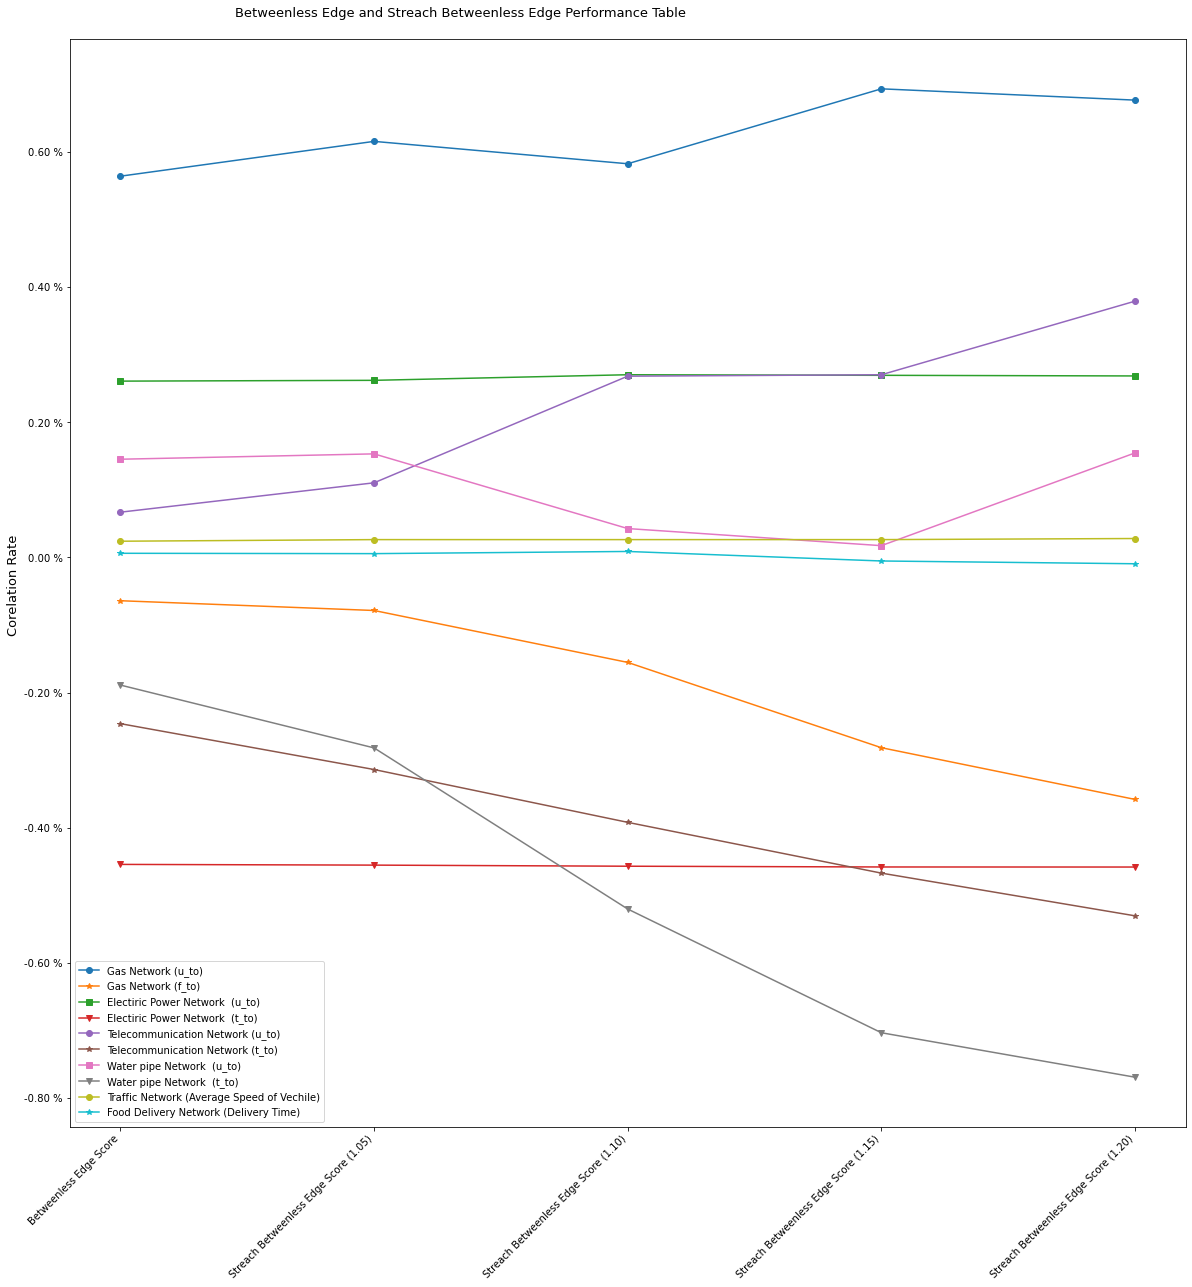

In [432]:
# = ["No-Discard","1-Discard","2-Discard","3-Discard","4-Discard","5-Discard","6-Discard","7-Discard","8-Discard","9-Discard","10-Discard"]
x=["Betweenless Edge Score","Streach Betweenless Edge Score (1.05)","Streach Betweenless Edge Score (1.10)","Streach Betweenless Edge Score (1.15)","Streach Betweenless Edge Score (1.20)"]

 
# plot lines
plt.subplots(figsize=(20,20))

plt.plot(x, y1, marker='o',label = "Gas Network (u_to)" )
plt.plot(x, y2, marker='*',label = "Gas Network (f_to)")
plt.plot(x, y3, marker='s',label = "Electiric Power Network  (u_to)")
plt.plot(x, y4, marker='v',label = "Electiric Power Network  (t_to)")
plt.plot(x, y5, marker='o',label = "Telecommunication Network (u_to)" )
plt.plot(x, y6, marker='*',label = "Telecommunication Network (t_to)")
plt.plot(x, y7, marker='s',label = "Water pipe Network  (u_to)")
plt.plot(x, y8, marker='v',label = "Water pipe Network  (t_to)")
plt.plot(x, y9, marker='o',label = "Traffic Network (Average Speed of Vechile)" )
plt.plot(x, y10, marker='*',label = "Food Delivery Network (Delivery Time)")






plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f %%' ))
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f Discard'))

plt.text(0.45, 0.80, 'Betweenless Edge and Streach Betweenless Edge Performance Table', fontsize = 13)

#plt.xlabel("Discard Value",fontsize = 13)
plt.ylabel("Corelation Rate ", fontsize = 13)

plt.xticks(rotation=45, ha='right')
plt.legend(loc = 'best' )
plt.savefig('figure2.png')
plt.show()


In [82]:
Betweenless Edge Score	Streach Betweenless Edge Score (0.95)	Streach Betweenless Edge Score (0.90)	Streach Betweenless Edge Score (0.85)	Streach Betweenless Edge Score (0.80)
